# Feature selection

Notebook used for feature selection experimenting. Only report cells are able to run.

In [1]:
from utils import *

In [ ]:
DATA_AVAILABLE = False

In [11]:
if DATA_AVAILABLE:
    charged_off = pd.read_csv('data\\Charged_Off_Imputed.csv', index_col = 0)
    marked_frauds = pd.read_csv('data\\Marked_Imputed.csv', index_col = 0)

## Correlated features

Example of using CorrelationMatrixTransformer

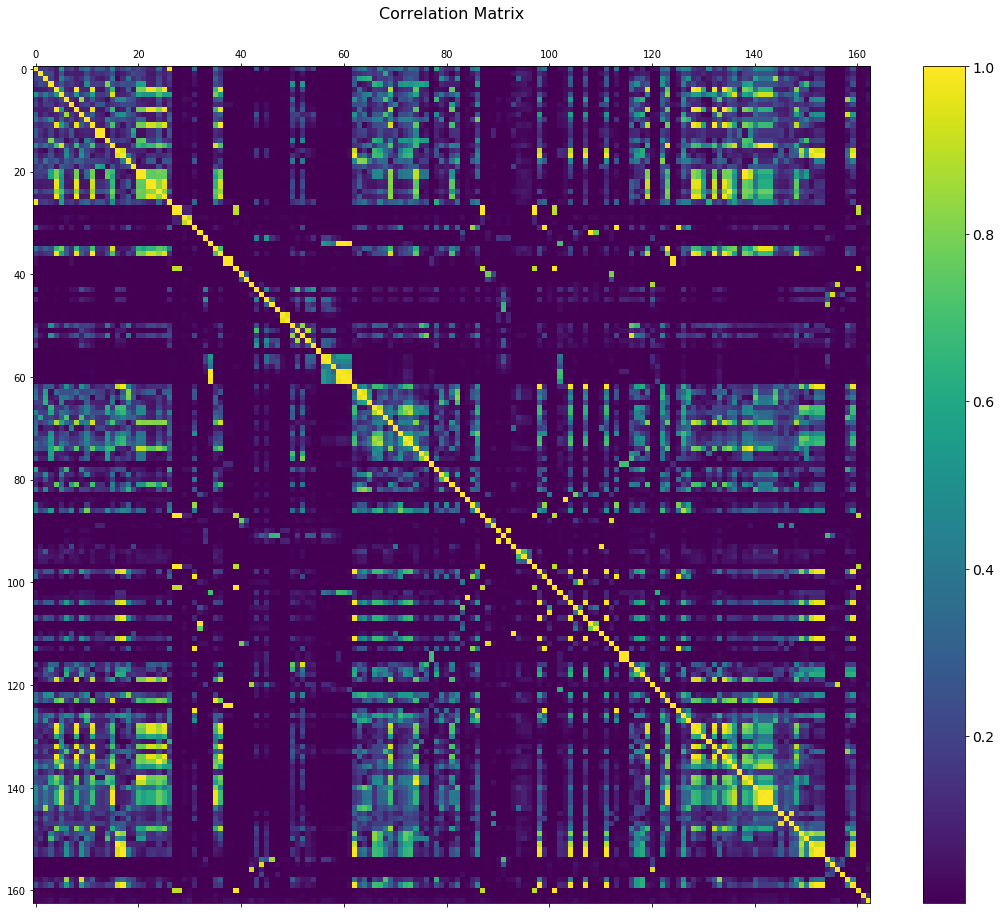

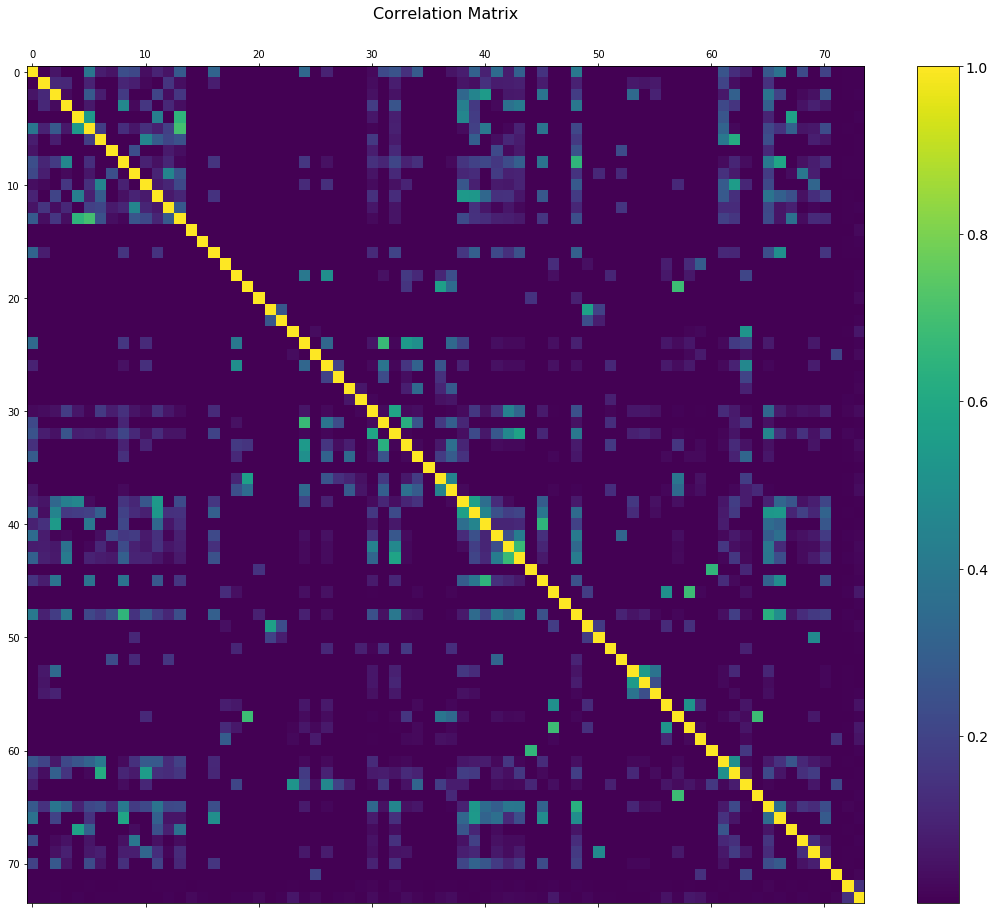

In [12]:
plot_corr_matrix(charged_off)
reduced_by_correlation = CorrelationMatrixTransformer(corr=0.7).fit_transform(charged_off)
plot_corr_matrix(reduced_by_correlation)

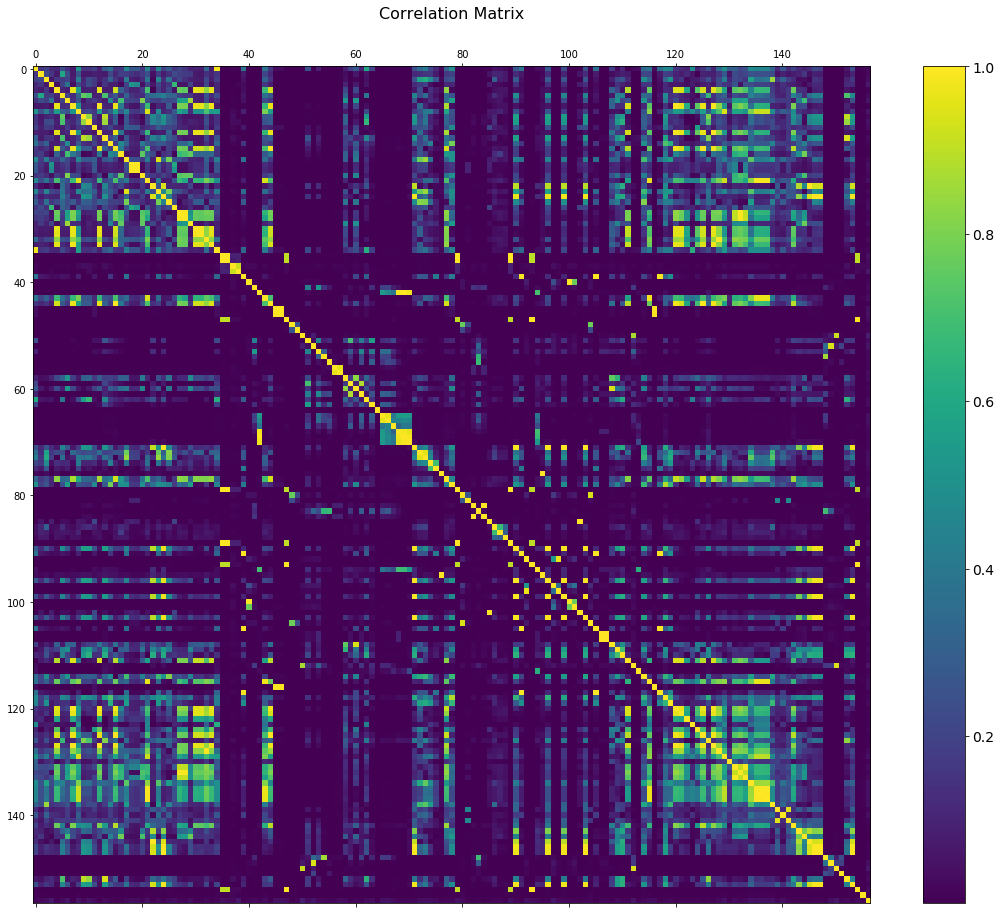

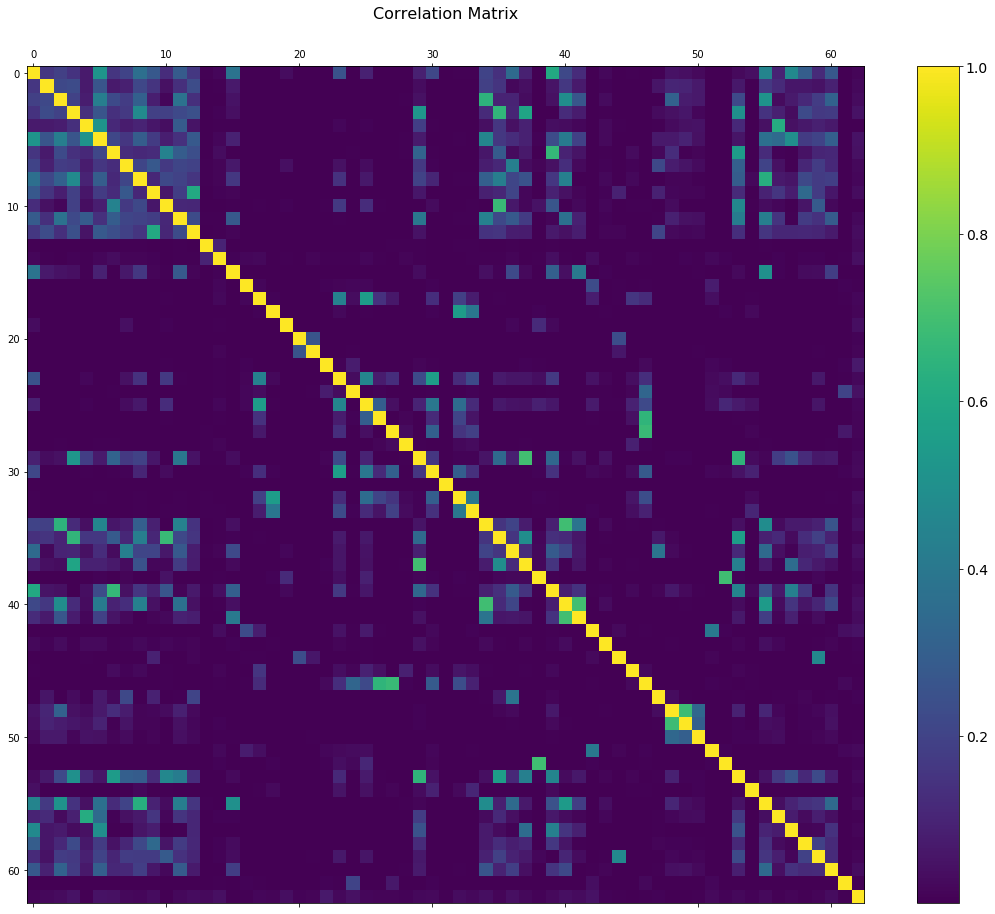

In [3]:
plot_corr_matrix(marked_frauds)
reduced_by_correlation = CorrelationMatrixTransformer(corr=0.7).fit_transform(charged_off.drop('fraud', axis=1), charged_off['fraud'])
plot_corr_matrix(reduced_by_correlation)

## Feature selection methods

In [ ]:
clf_tree = tree.DecisionTreeClassifier(random_state=12)
clf_r_forrest = RandomForestClassifier(random_state=12)
clf_log = LogisticRegression(random_state=12)
strategies = [
    RFE(step=5, n_features_to_select=5, estimator=clf_r_forrest), 
    RFE(step=5, n_features_to_select=10, estimator=clf_r_forrest),
    RFE(step=5, n_features_to_select=20, estimator=clf_r_forrest), 
    RFE(step=5, n_features_to_select=40, estimator=clf_r_forrest),
    RFE(step=5, n_features_to_select=5, estimator=clf_tree), 
    RFE(step=5, n_features_to_select=10, estimator=clf_tree),
    RFE(step=5, n_features_to_select=20, estimator=clf_tree), 
    RFE(step=5, n_features_to_select=40, estimator=clf_tree),
    RFE(step=5, n_features_to_select=5, estimator=clf_log), 
    RFE(step=5, n_features_to_select=10, estimator=clf_log),
    RFE(step=5, n_features_to_select=20, estimator=clf_log), 
    RFE(step=5, n_features_to_select=40, estimator=clf_log),
    SelectKBest(f_classif, k=5), SelectKBest(f_classif, k=10), 
    SelectKBest(f_classif, k=20), SelectKBest(f_classif, k=40),
    CorrelationMatrixTransformer(0.1), CorrelationMatrixTransformer(0.2), 
    CorrelationMatrixTransformer(0.5), CorrelationMatrixTransformer(0.8), 
    CorrelationMatrixTransformer(0.95)
]
if DATA_AVAILABLE:
    df = stratified_k_fold(charged_off, strategies, 'Feature_Selection_Charged_Off', False)
    df.to_csv('experiments/Feature_Selection/A.csv')

Overall results (mean): 


f1  \
preprocessor                                       classifier                                      
0                                                  DecisionTreeClassifier(random_state=12)  0.29   
                                                   LogisticRegression(random_state=12)      0.19   
                                                   MLPClassifier(random_state=12)           0.29   
                                                   RandomForestClassifier(random_state=12)  0.35   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.1)             DecisionTreeClassifier(random_state=12)  0.22   
                                                   LogisticRegression(random_state=12)      0.16   
                                                   MLPClassifier(random_state=12)           0.18   
                                                   RandomForestClassifier(random_state=12)  0.27   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.2)             DecisionTreeClassifier(random_state=12)  0.24   
                                                   LogisticRegression(random_state=12)      0.12   
                                                   MLPClassifier(random_state=12)           0.20   
                                                   RandomForestClassifier(random_state=12)  0.30   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.5)             DecisionTreeClassifier(random_state=12)  0.25   
                                                   LogisticRegression(random_state=12)      0.07   
                                                   MLPClassifier(random_state=12)           0.21   
                                                   RandomForestClassifier(random_state=12)  0.32   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.8)             DecisionTreeClassifier(random_state=12)  0.27   
                                                   LogisticRegression(random_state=12)      0.15   
                                                   MLPClassifier(random_state=12)           0.24   
                                                   RandomForestClassifier(random_state=12)  0.34   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.95)            DecisionTreeClassifier(random_state=12)  0.27   
                                                   LogisticRegression(random_state=12)      0.18   
                                                   MLPClassifier(random_state=12)           0.29   
                                                   RandomForestClassifier(random_state=12)  0.34   
                                                   SVC(random_state=12)                     0.02   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.26   
                                                   LogisticRegression(random_state=12)      0.12   
                                                   MLPClassifier(random_state=12)           0.24   
                                                   RandomForestClassifier(random_state=12)  0.34   
                                                   SVC(random_state=12)                     0.02   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.28   
                                                   LogisticRegression(random_state=12)      0.18   
                                                   MLPClassifier(random_state=12)           0.26   
                                                   RandomForestClassifier(random_state=12)  0.

Overall results (max): 


f1  \
preprocessor                                       classifier                                      
0                                                  DecisionTreeClassifier(random_state=12)  0.35   
                                                   LogisticRegression(random_state=12)      0.29   
                                                   MLPClassifier(random_state=12)           0.34   
                                                   RandomForestClassifier(random_state=12)  0.44   
                                                   SVC(random_state=12)                     0.09   
CorrelationMatrixTransformer(corr=0.1)             DecisionTreeClassifier(random_state=12)  0.29   
                                                   LogisticRegression(random_state=12)      0.21   
                                                   MLPClassifier(random_state=12)           0.23   
                                                   RandomForestClassifier(random_state=12)  0.30   
                                                   SVC(random_state=12)                     0.10   
CorrelationMatrixTransformer(corr=0.2)             DecisionTreeClassifier(random_state=12)  0.30   
                                                   LogisticRegression(random_state=12)      0.21   
                                                   MLPClassifier(random_state=12)           0.25   
                                                   RandomForestClassifier(random_state=12)  0.36   
                                                   SVC(random_state=12)                     0.10   
CorrelationMatrixTransformer(corr=0.5)             DecisionTreeClassifier(random_state=12)  0.31   
                                                   LogisticRegression(random_state=12)      0.15   
                                                   MLPClassifier(random_state=12)           0.25   
                                                   RandomForestClassifier(random_state=12)  0.39   
                                                   SVC(random_state=12)                     0.09   
CorrelationMatrixTransformer(corr=0.8)             DecisionTreeClassifier(random_state=12)  0.32   
                                                   LogisticRegression(random_state=12)      0.25   
                                                   MLPClassifier(random_state=12)           0.29   
                                                   RandomForestClassifier(random_state=12)  0.43   
                                                   SVC(random_state=12)                     0.09   
CorrelationMatrixTransformer(corr=0.95)            DecisionTreeClassifier(random_state=12)  0.32   
                                                   LogisticRegression(random_state=12)      0.28   
                                                   MLPClassifier(random_state=12)           0.34   
                                                   RandomForestClassifier(random_state=12)  0.44   
                                                   SVC(random_state=12)                     0.10   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.30   
                                                   LogisticRegression(random_state=12)      0.23   
                                                   MLPClassifier(random_state=12)           0.28   
                                                   RandomForestClassifier(random_state=12)  0.39   
                                                   SVC(random_state=12)                     0.09   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.33   
                                                   LogisticRegression(random_state=12)      0.23   
                                                   MLPClassifier(random_state=12)           0.30   
                                                   RandomForestClassifier(random_state=12)  0.

Grouped by Preprocessor (mean):


f1  precision  recall
preprocessor                                                               
0                                                   0.23       0.24    0.44
CorrelationMatrixTransformer(corr=0.1)              0.17       0.23    0.35
CorrelationMatrixTransformer(corr=0.2)              0.18       0.22    0.36
CorrelationMatrixTransformer(corr=0.5)              0.18       0.21    0.36
CorrelationMatrixTransformer(corr=0.8)              0.20       0.22    0.40
CorrelationMatrixTransformer(corr=0.95)             0.22       0.23    0.43
RFE(estimator=DecisionTreeClassifier(random_sta...  0.20       0.21    0.40
RFE(estimator=DecisionTreeClassifier(random_sta...  0.22       0.23    0.41
RFE(estimator=DecisionTreeClassifier(random_sta...  0.21       0.23    0.42
RFE(estimator=DecisionTreeClassifier(random_sta...  0.18       0.21    0.36
RFE(estimator=LogisticRegression(random_state=1...  0.17       0.21    0.34
RFE(estimator=LogisticRegression(random_state=1...  0.21       0.25    0.39
RFE(estimator=LogisticRegression(random_state=1...  0.24       0.26    0.44
RFE(estimator=LogisticRegression(random_state=1...  0.12       0.19    0.31
RFE(estimator=RandomForestClassifier(random_sta...  0.19       0.21    0.40
RFE(estimator=RandomForestClassifier(random_sta...  0.22       0.23    0.41
RFE(estimator=RandomForestClassifier(random_sta...  0.22       0.23    0.43
RFE(estimator=RandomForestClassifier(random_sta...  0.19       0.24    0.39
SelectKBest()                                       0.17       0.23    0.36
SelectKBest(k=20)                                   0.18       0.22    0.36
SelectKBest(k=40)                                   0.20       0.22    0.39
SelectKBest(k=5)                                    0.17       0.24    0.34

Grouped by Classifier (mean):


f1  precision  recall
classifier                                                      
DecisionTreeClassifier(random_state=12)  0.25       0.18    0.51
LogisticRegression(random_state=12)      0.15       0.23    0.27
MLPClassifier(random_state=12)           0.23       0.21    0.46
RandomForestClassifier(random_state=12)  0.31       0.48    0.44
SVC(random_state=12)                     0.03       0.03    0.24

Top 10 by f1:


classifier  \
307  RandomForestClassifier(random_state=12)   
306  RandomForestClassifier(random_state=12)   
305  RandomForestClassifier(random_state=12)   
293  RandomForestClassifier(random_state=12)   
179  RandomForestClassifier(random_state=12)   
297  RandomForestClassifier(random_state=12)   
289  RandomForestClassifier(random_state=12)   
292  RandomForestClassifier(random_state=12)   
301  RandomForestClassifier(random_state=12)   
178  RandomForestClassifier(random_state=12)   

                                          preprocessor  prior    f1  \
307                                                  0   0.25  0.44   
306            CorrelationMatrixTransformer(corr=0.95)   0.25  0.44   
305             CorrelationMatrixTransformer(corr=0.8)   0.25  0.43   
293  RFE(estimator=DecisionTreeClassifier(random_st...   0.25  0.43   
179  RFE(estimator=RandomForestClassifier(random_st...   0.10  0.42   
297  RFE(estimator=LogisticRegression(random_state=...   0.25  0.42   
289  RFE(estimator=RandomForestClassifier(random_st...   0.25  0.41   
292  RFE(estimator=DecisionTreeClassifier(random_st...   0.25  0.41   
301                                  SelectKBest(k=40)   0.25  0.41   
178  RFE(estimator=RandomForestClassifier(random_st...   0.10  0.40   

     precision  recall            dataset_description  
307       0.35    0.62  Feature_Selection_Charged_Off  
306       0.35    0.61  Feature_Selection_Charged_Off  
305       0.34    0.57  Feature_Selection_Charged_Off  
293       0.34    0.60  Feature_Selection_Charged_Off  
179       0.64    0.32  Feature_Selection_Charged_Off  
297       0.33    0.58  Feature_Selection_Charged_Off  
289       0.30    0.63  Feature_Selection_Charged_Off  
292       0.32    0.60  Feature_Selection_Charged_Off  
301       0.34    0.54  Feature_Selection_Charged_Off  
178       0.62    0.30  Feature_Selection_Charged_Off

Top 10 by precision:


classifier  \
87  RandomForestClassifier(random_state=12)   
85  RandomForestClassifier(random_state=12)   
84  RandomForestClassifier(random_state=12)   
86  RandomForestClassifier(random_state=12)   
81  RandomForestClassifier(random_state=12)   
73  RandomForestClassifier(random_state=12)   
80  RandomForestClassifier(random_state=12)   
83  RandomForestClassifier(random_state=12)   
77  RandomForestClassifier(random_state=12)   
72  RandomForestClassifier(random_state=12)   

                                         preprocessor  prior    f1  precision  \
87                                                  0   0.05  0.29       0.98   
85             CorrelationMatrixTransformer(corr=0.8)   0.05  0.29       0.98   
84             CorrelationMatrixTransformer(corr=0.5)   0.05  0.28       0.98   
86            CorrelationMatrixTransformer(corr=0.95)   0.05  0.29       0.97   
81                                  SelectKBest(k=40)   0.05  0.29       0.96   
73  RFE(estimator=DecisionTreeClassifier(random_st...   0.05  0.28       0.96   
80                                  SelectKBest(k=20)   0.05  0.29       0.94   
83             CorrelationMatrixTransformer(corr=0.2)   0.05  0.28       0.94   
77  RFE(estimator=LogisticRegression(random_state=...   0.05  0.30       0.94   
72  RFE(estimator=DecisionTreeClassifier(random_st...   0.05  0.31       0.93   

    recall            dataset_description  
87    0.18  Feature_Selection_Charged_Off  
85    0.17  Feature_Selection_Charged_Off  
84    0.16  Feature_Selection_Charged_Off  
86    0.17  Feature_Selection_Charged_Off  
81    0.17  Feature_Selection_Charged_Off  
73    0.17  Feature_Selection_Charged_Off  
80    0.17  Feature_Selection_Charged_Off  
83    0.16  Feature_Selection_Charged_Off  
77    0.18  Feature_Selection_Charged_Off  
72    0.18  Feature_Selection_Charged_Off

Top 10 by recall:


classifier                                       preprocessor  \
375  SVC(random_state=12)  RFE(estimator=RandomForestClassifier(random_st...   
377  SVC(random_state=12)  RFE(estimator=RandomForestClassifier(random_st...   
384  SVC(random_state=12)  RFE(estimator=LogisticRegression(random_state=...   
395  SVC(random_state=12)                                                  0   
374  SVC(random_state=12)  RFE(estimator=RandomForestClassifier(random_st...   
376  SVC(random_state=12)  RFE(estimator=RandomForestClassifier(random_st...   
394  SVC(random_state=12)            CorrelationMatrixTransformer(corr=0.95)   
379  SVC(random_state=12)  RFE(estimator=DecisionTreeClassifier(random_st...   
393  SVC(random_state=12)             CorrelationMatrixTransformer(corr=0.8)   
380  SVC(random_state=12)  RFE(estimator=DecisionTreeClassifier(random_st...   

     prior    f1  precision  recall            dataset_description  
375    0.5  0.10       0.05    0.98  Feature_Selection_Charged_Off  
377    0.5  0.09       0.05    0.98  Feature_Selection_Charged_Off  
384    0.5  0.10       0.05    0.97  Feature_Selection_Charged_Off  
395    0.5  0.09       0.05    0.97  Feature_Selection_Charged_Off  
374    0.5  0.10       0.05    0.97  Feature_Selection_Charged_Off  
376    0.5  0.10       0.05    0.97  Feature_Selection_Charged_Off  
394    0.5  0.10       0.05    0.97  Feature_Selection_Charged_Off  
379    0.5  0.09       0.05    0.97  Feature_Selection_Charged_Off  
393    0.5  0.09       0.05    0.97  Feature_Selection_Charged_Off  
380    0.5  0.10       0.05    0.97  Feature_Selection_Charged_Off

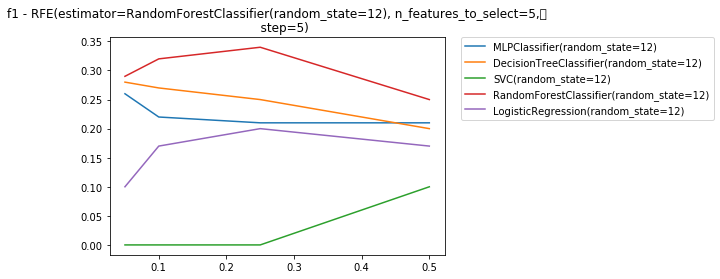

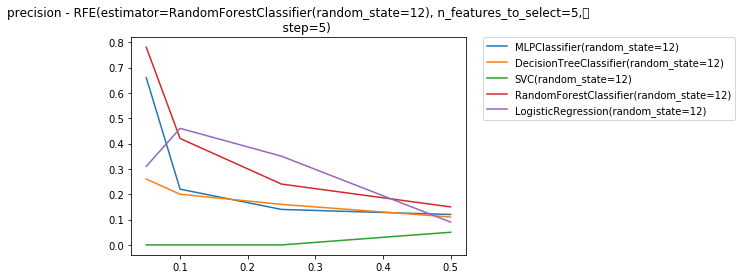

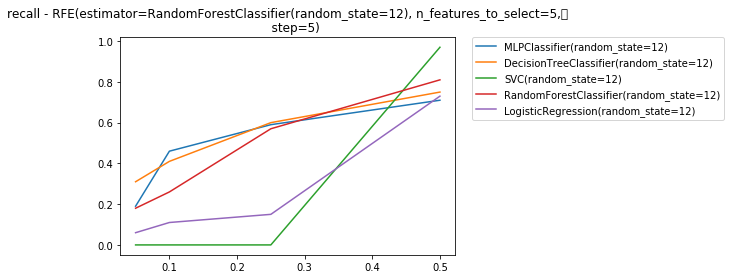

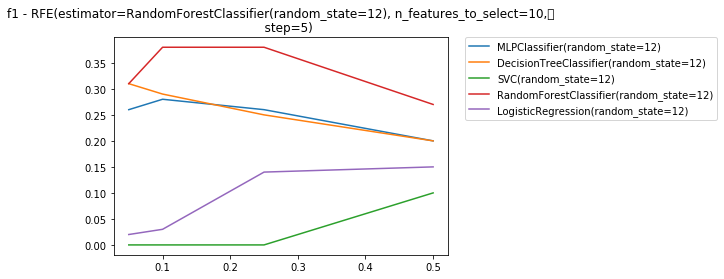

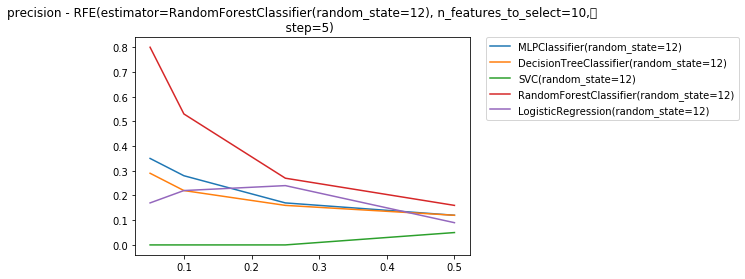

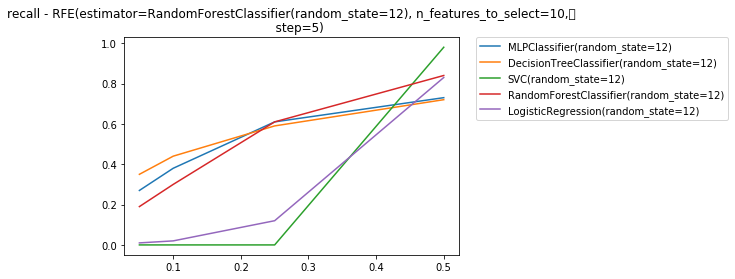

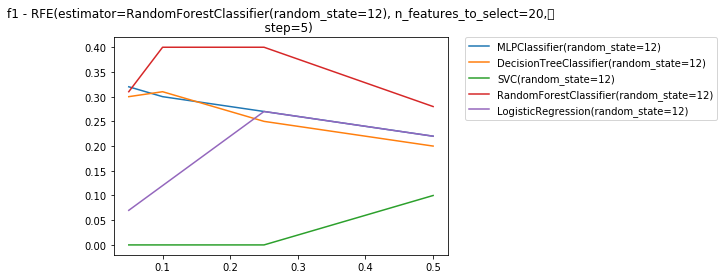

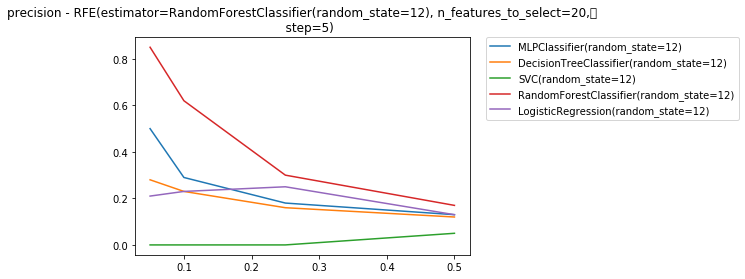

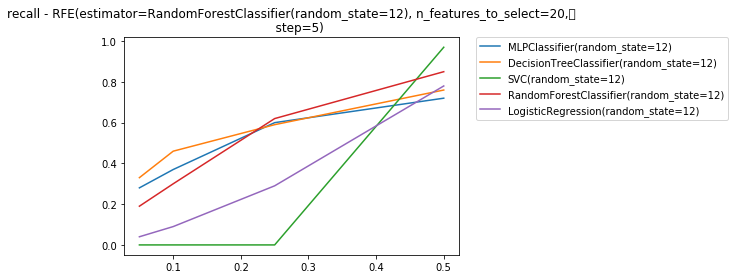

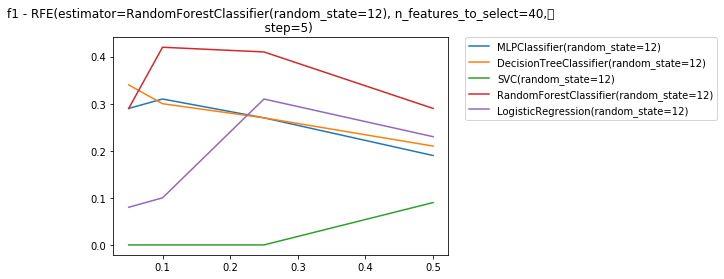

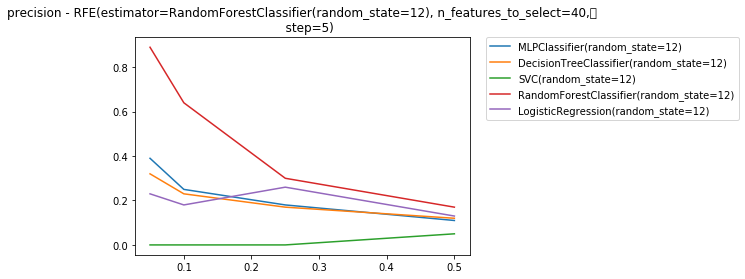

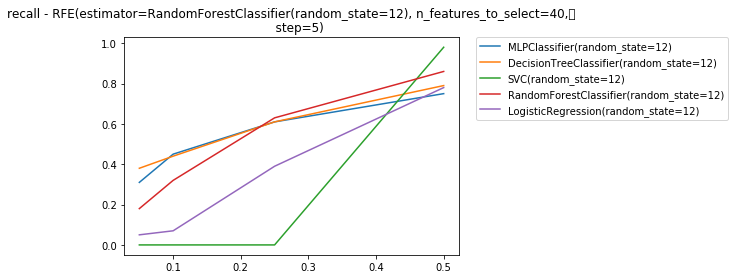

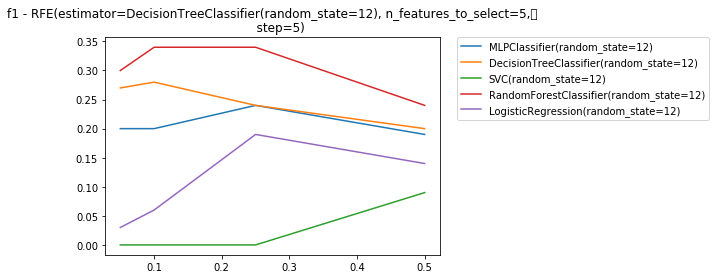

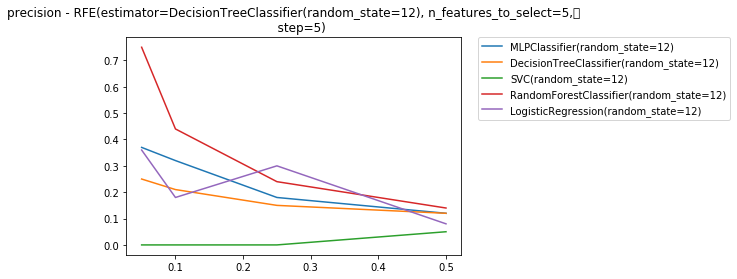

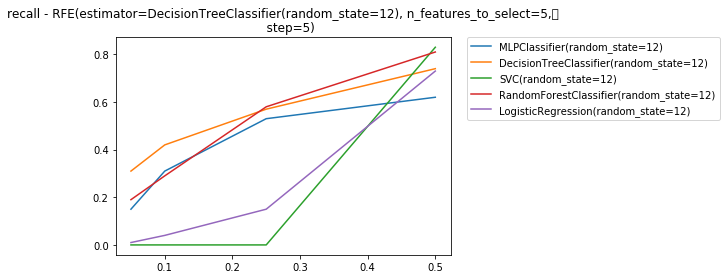

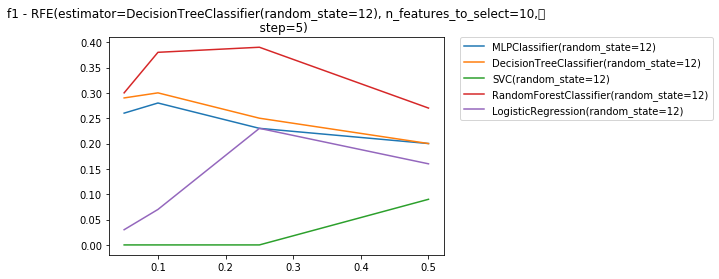

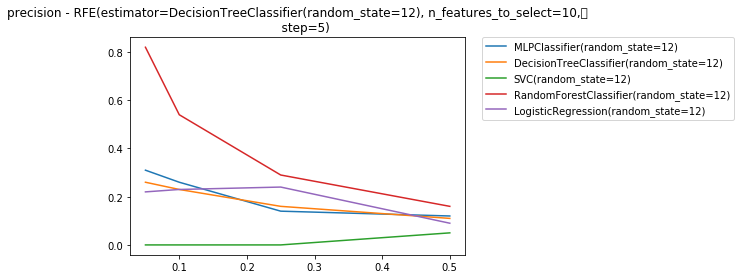

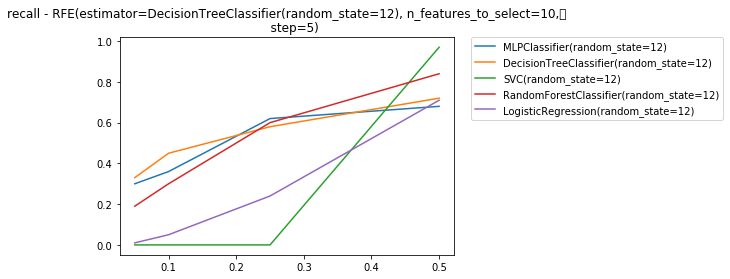

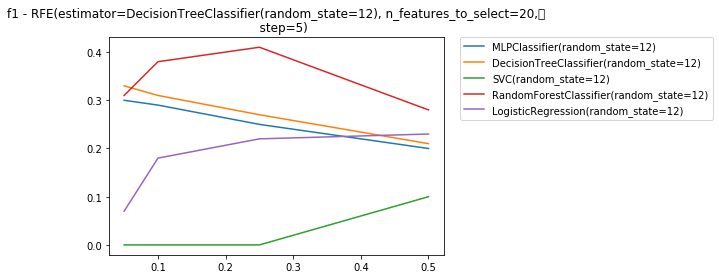

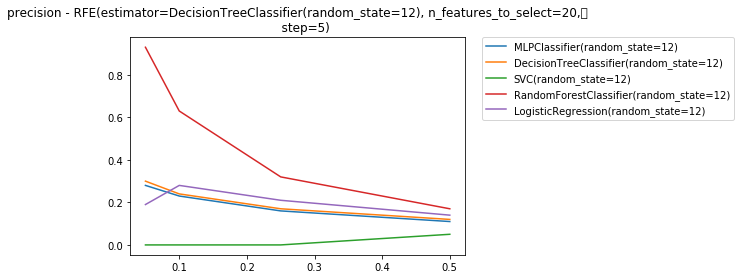

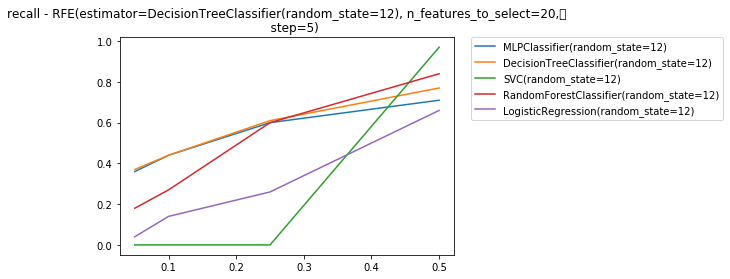

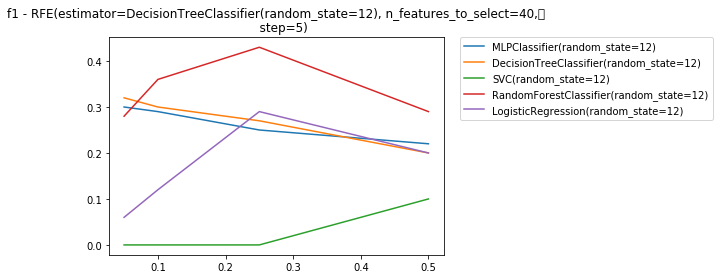

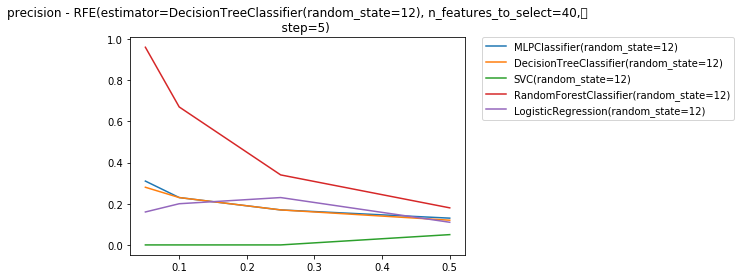

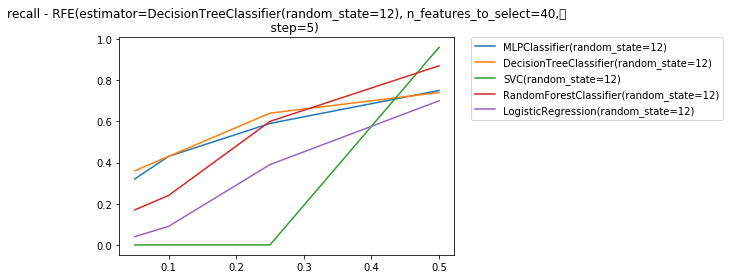

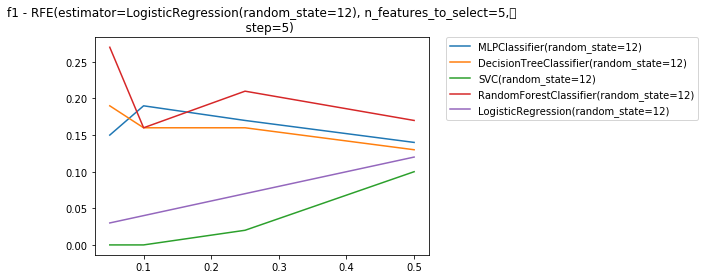

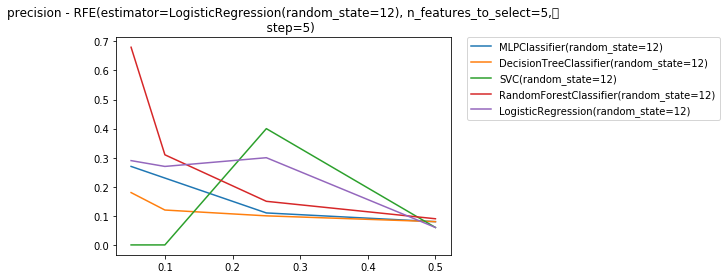

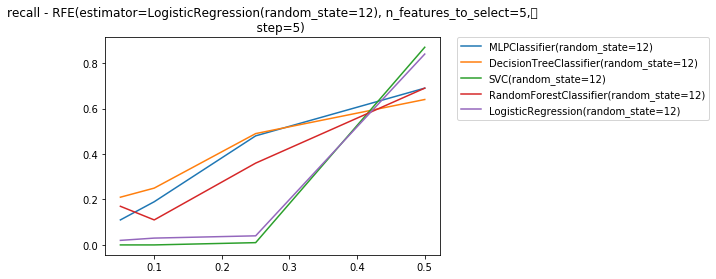

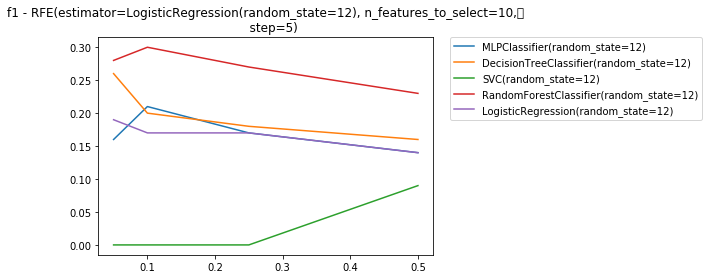

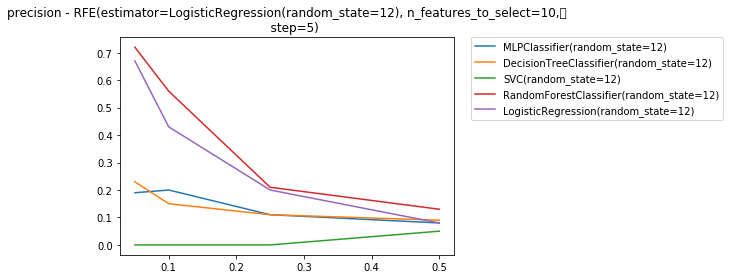

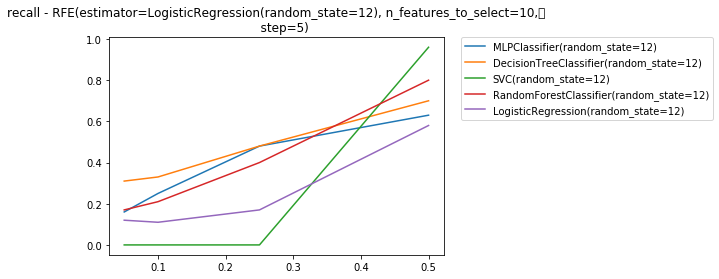

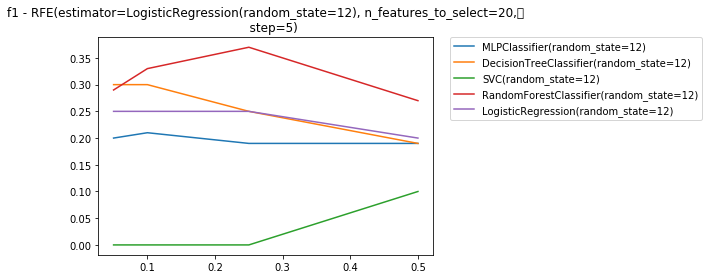

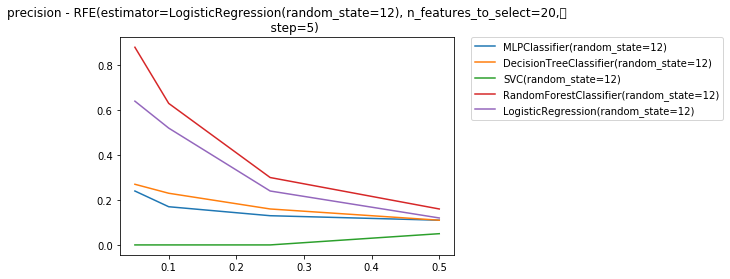

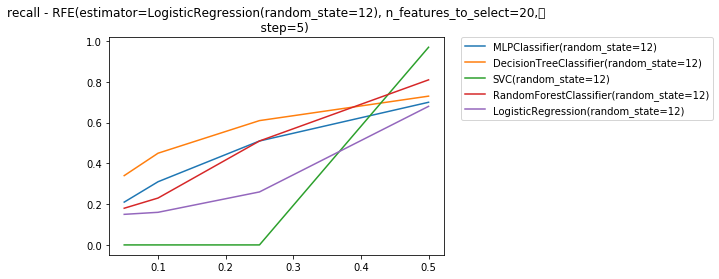

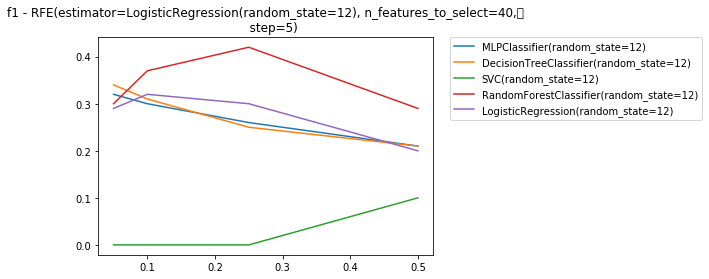

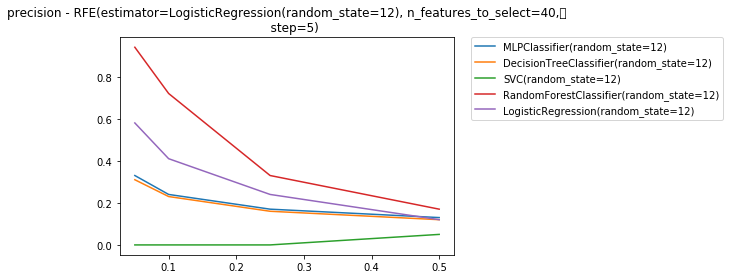

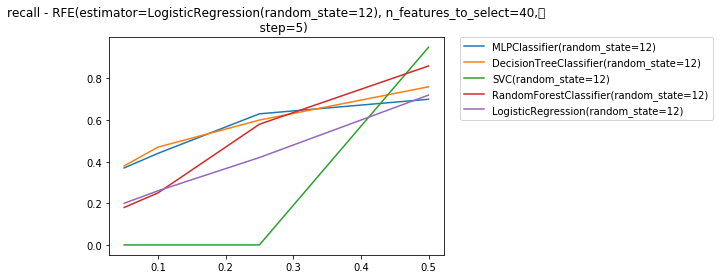

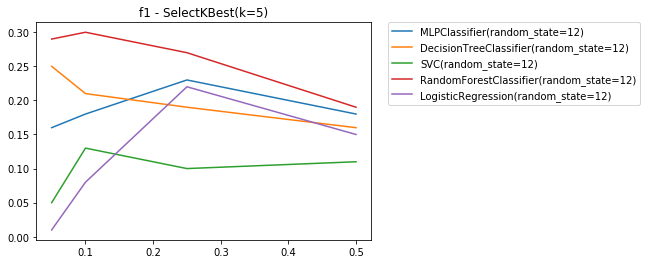

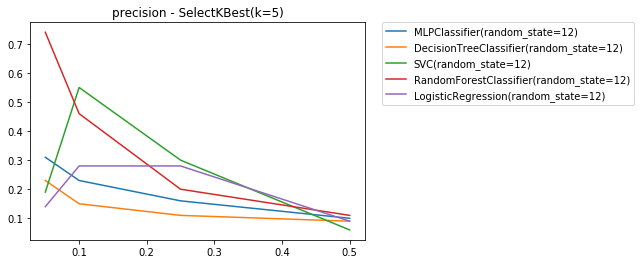

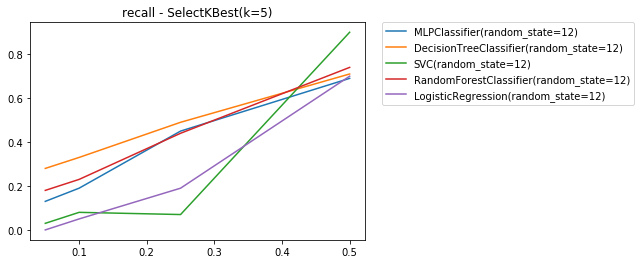

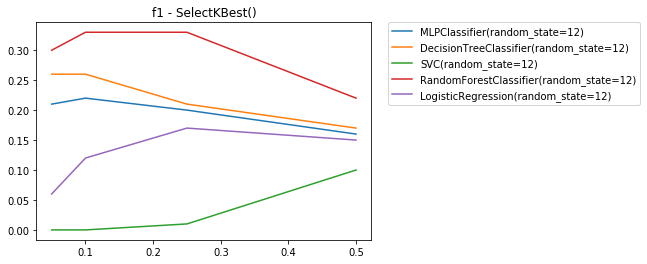

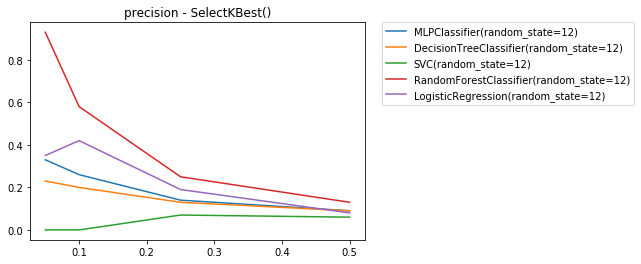

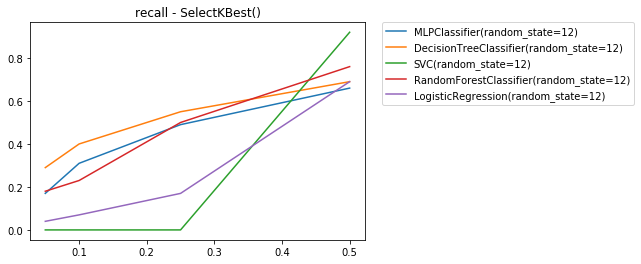

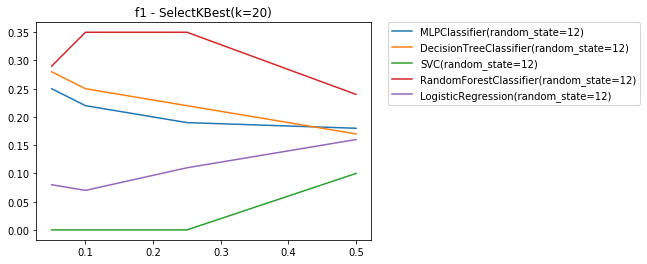

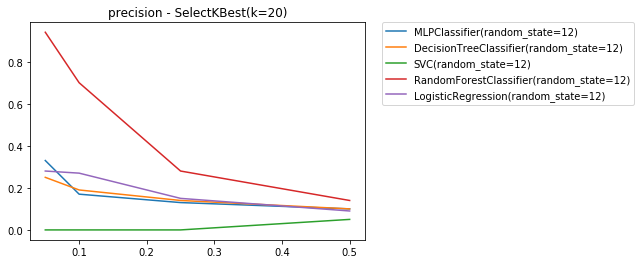

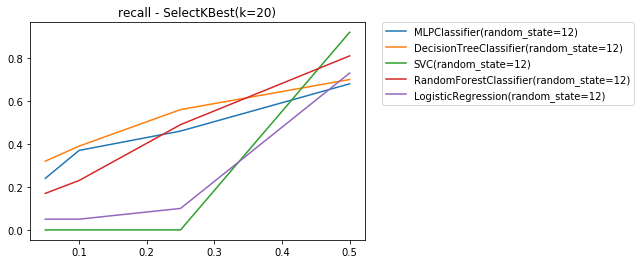

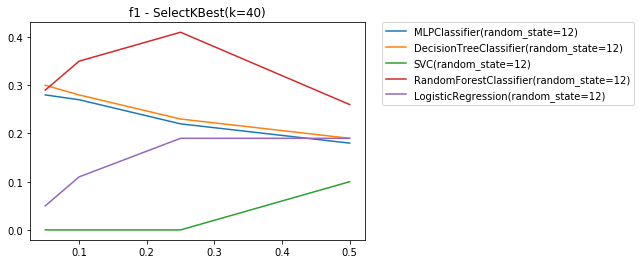

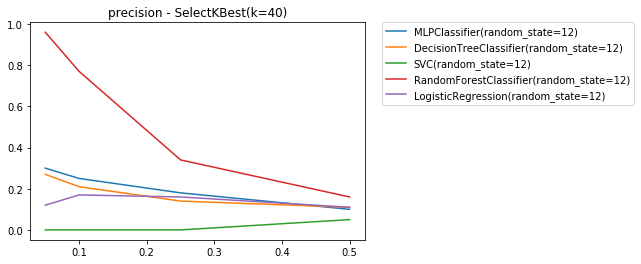

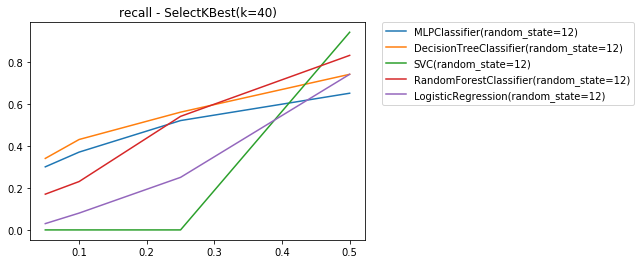

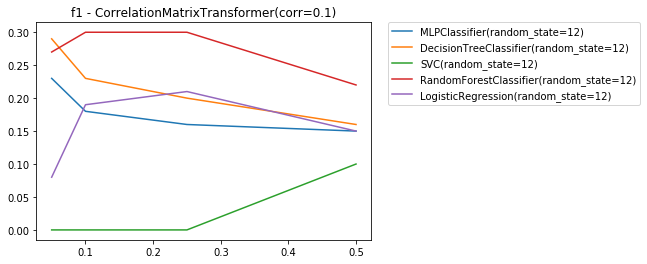

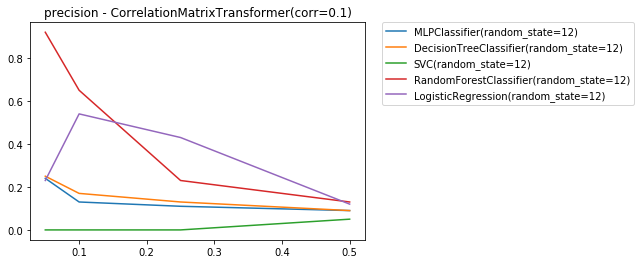

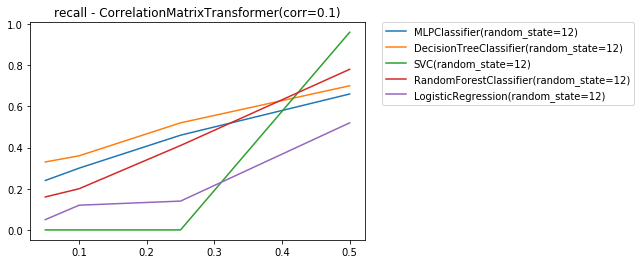

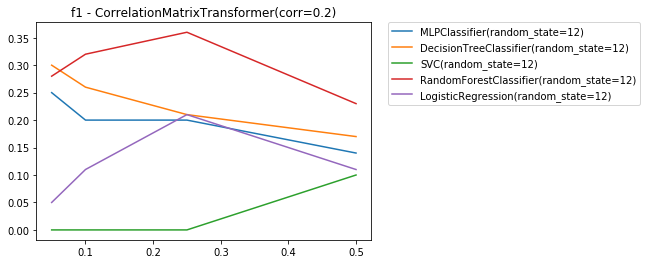

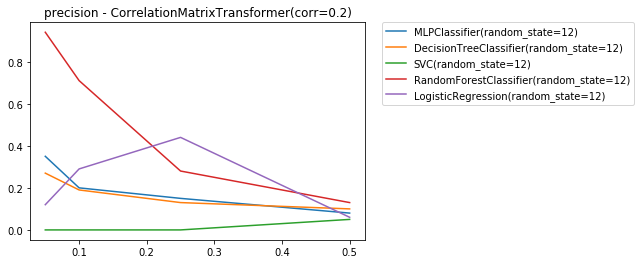

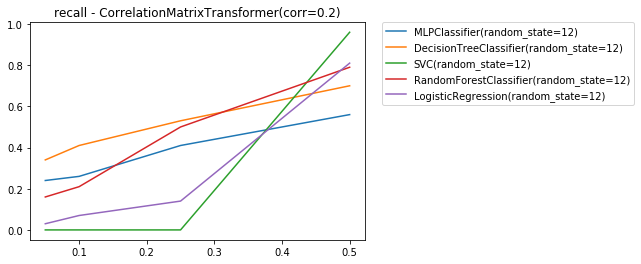

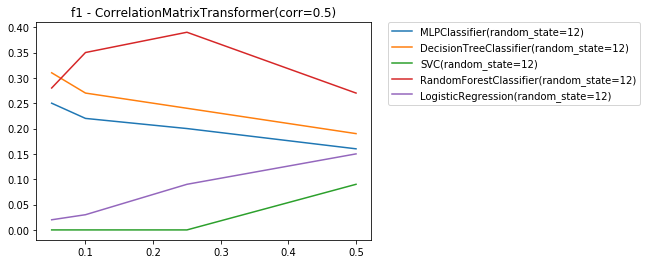

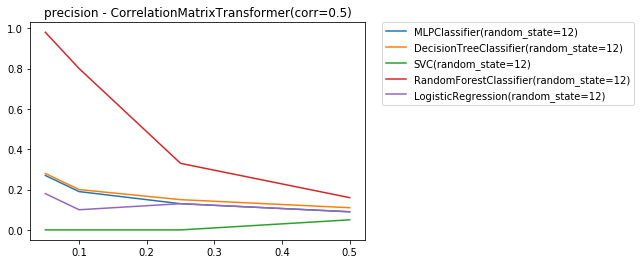

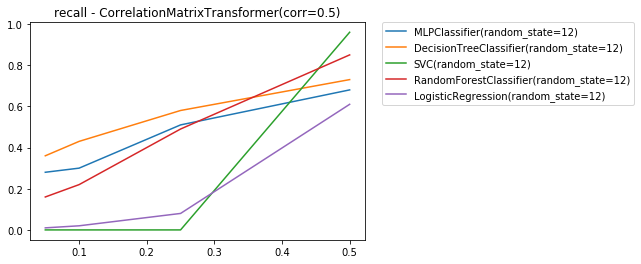

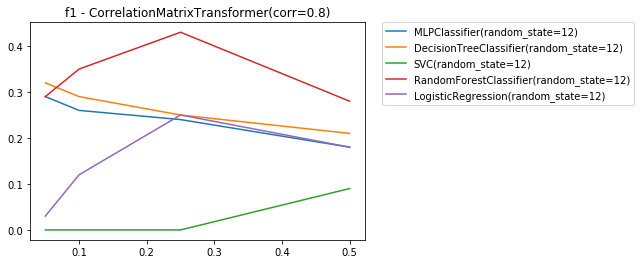

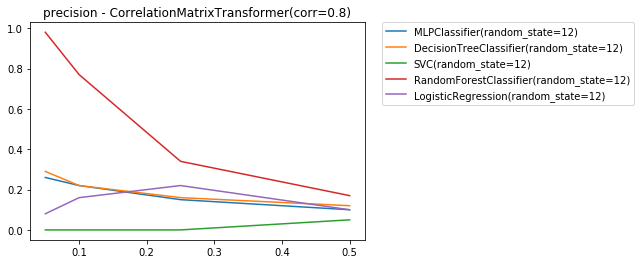

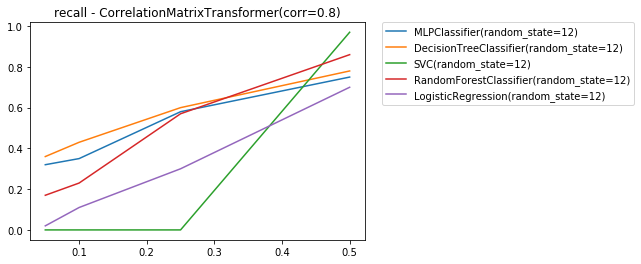

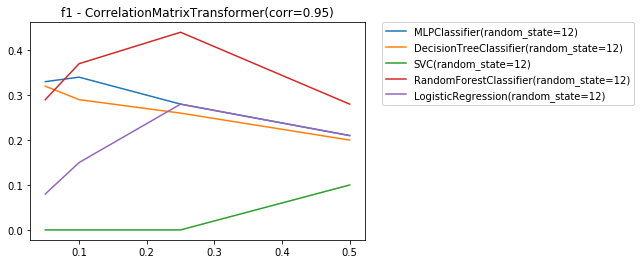

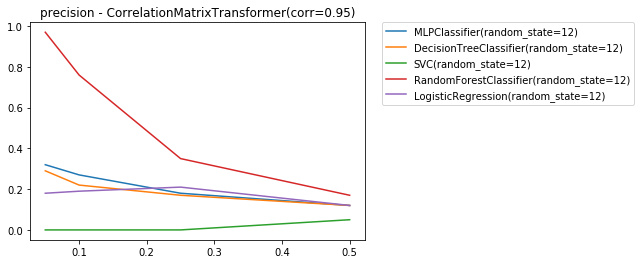

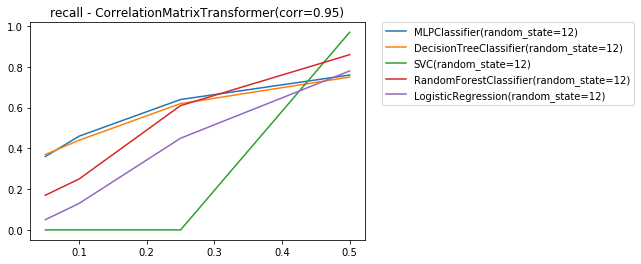

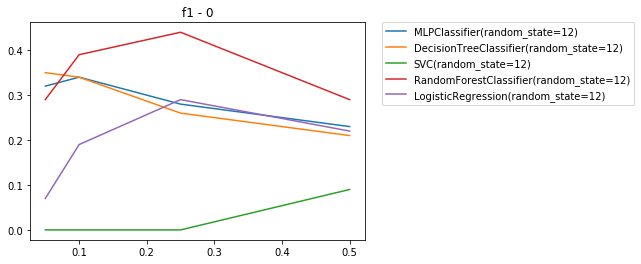

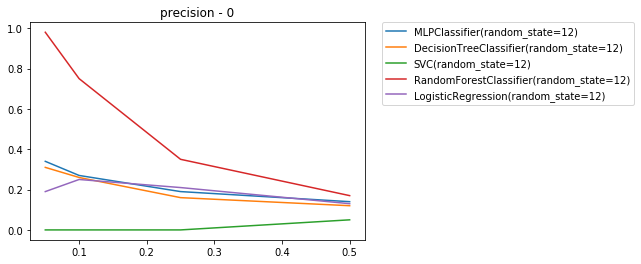

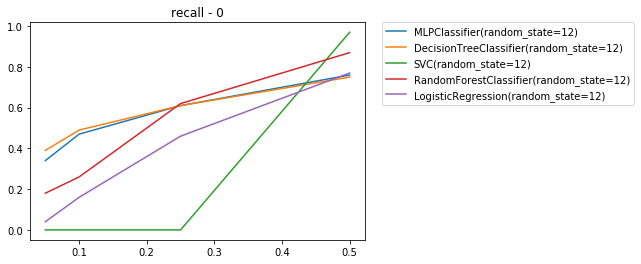

In [18]:
pd.set_option("display.max_rows", 200, "display.max_columns", 30)
get_report(pd.read_csv('experiments/Feature_Selection/A.csv', index_col=0).fillna(0))

In [10]:
if DATA_AVAILABLE:
    df = stratified_k_fold(marked_frauds, strategies, 'Feature_Selection_Marked', verbose=False, f_type='marked')
    df.to_csv('experiments/Feature_Selection/B.csv')

Overall results (mean): 


f1  \
preprocessor                                       classifier                                      
0                                                  DecisionTreeClassifier(random_state=12)  0.07   
                                                   LogisticRegression(random_state=12)      0.09   
                                                   MLPClassifier(random_state=12)           0.08   
                                                   RandomForestClassifier(random_state=12)  0.15   
                                                   SVC(random_state=12)                     0.00   
CorrelationMatrixTransformer(corr=0.1)             DecisionTreeClassifier(random_state=12)  0.03   
                                                   LogisticRegression(random_state=12)      0.01   
                                                   MLPClassifier(random_state=12)           0.02   
                                                   RandomForestClassifier(random_state=12)  0.02   
                                                   SVC(random_state=12)                     0.00   
CorrelationMatrixTransformer(corr=0.2)             DecisionTreeClassifier(random_state=12)  0.04   
                                                   LogisticRegression(random_state=12)      0.01   
                                                   MLPClassifier(random_state=12)           0.02   
                                                   RandomForestClassifier(random_state=12)  0.05   
                                                   SVC(random_state=12)                     0.00   
CorrelationMatrixTransformer(corr=0.5)             DecisionTreeClassifier(random_state=12)  0.05   
                                                   LogisticRegression(random_state=12)      0.02   
                                                   MLPClassifier(random_state=12)           0.03   
                                                   RandomForestClassifier(random_state=12)  0.08   
                                                   SVC(random_state=12)                     0.00   
CorrelationMatrixTransformer(corr=0.8)             DecisionTreeClassifier(random_state=12)  0.06   
                                                   LogisticRegression(random_state=12)      0.05   
                                                   MLPClassifier(random_state=12)           0.06   
                                                   RandomForestClassifier(random_state=12)  0.11   
                                                   SVC(random_state=12)                     0.01   
CorrelationMatrixTransformer(corr=0.95)            DecisionTreeClassifier(random_state=12)  0.06   
                                                   LogisticRegression(random_state=12)      0.07   
                                                   MLPClassifier(random_state=12)           0.05   
                                                   RandomForestClassifier(random_state=12)  0.12   
                                                   SVC(random_state=12)                     0.01   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.07   
                                                   LogisticRegression(random_state=12)      0.03   
                                                   MLPClassifier(random_state=12)           0.02   
                                                   RandomForestClassifier(random_state=12)  0.12   
                                                   SVC(random_state=12)                     0.01   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.07   
                                                   LogisticRegression(random_state=12)      0.05   
                                                   MLPClassifier(random_state=12)           0.03   
                                                   RandomForestClassifier(random_state=12)  0.

Overall results (max): 


f1  \
preprocessor                                       classifier                                      
0                                                  DecisionTreeClassifier(random_state=12)  0.11   
                                                   LogisticRegression(random_state=12)      0.14   
                                                   MLPClassifier(random_state=12)           0.16   
                                                   RandomForestClassifier(random_state=12)  0.32   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.1)             DecisionTreeClassifier(random_state=12)  0.04   
                                                   LogisticRegression(random_state=12)      0.02   
                                                   MLPClassifier(random_state=12)           0.04   
                                                   RandomForestClassifier(random_state=12)  0.06   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.2)             DecisionTreeClassifier(random_state=12)  0.08   
                                                   LogisticRegression(random_state=12)      0.02   
                                                   MLPClassifier(random_state=12)           0.04   
                                                   RandomForestClassifier(random_state=12)  0.10   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.5)             DecisionTreeClassifier(random_state=12)  0.09   
                                                   LogisticRegression(random_state=12)      0.03   
                                                   MLPClassifier(random_state=12)           0.05   
                                                   RandomForestClassifier(random_state=12)  0.14   
                                                   SVC(random_state=12)                     0.02   
CorrelationMatrixTransformer(corr=0.8)             DecisionTreeClassifier(random_state=12)  0.11   
                                                   LogisticRegression(random_state=12)      0.08   
                                                   MLPClassifier(random_state=12)           0.11   
                                                   RandomForestClassifier(random_state=12)  0.22   
                                                   SVC(random_state=12)                     0.03   
CorrelationMatrixTransformer(corr=0.95)            DecisionTreeClassifier(random_state=12)  0.10   
                                                   LogisticRegression(random_state=12)      0.10   
                                                   MLPClassifier(random_state=12)           0.07   
                                                   RandomForestClassifier(random_state=12)  0.23   
                                                   SVC(random_state=12)                     0.02   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.10   
                                                   LogisticRegression(random_state=12)      0.05   
                                                   MLPClassifier(random_state=12)           0.02   
                                                   RandomForestClassifier(random_state=12)  0.22   
                                                   SVC(random_state=12)                     0.02   
RFE(estimator=DecisionTreeClassifier(random_sta... DecisionTreeClassifier(random_state=12)  0.14   
                                                   LogisticRegression(random_state=12)      0.07   
                                                   MLPClassifier(random_state=12)           0.04   
                                                   RandomForestClassifier(random_state=12)  0.

Grouped by Preprocessor (mean):


f1  precision  recall
preprocessor                                                               
0                                                   0.08       0.09    0.37
CorrelationMatrixTransformer(corr=0.1)              0.02       0.01    0.20
CorrelationMatrixTransformer(corr=0.2)              0.03       0.03    0.22
CorrelationMatrixTransformer(corr=0.5)              0.04       0.04    0.25
CorrelationMatrixTransformer(corr=0.8)              0.06       0.07    0.30
CorrelationMatrixTransformer(corr=0.95)             0.06       0.08    0.32
RFE(estimator=DecisionTreeClassifier(random_sta...  0.05       0.05    0.25
RFE(estimator=DecisionTreeClassifier(random_sta...  0.06       0.06    0.29
RFE(estimator=DecisionTreeClassifier(random_sta...  0.06       0.07    0.30
RFE(estimator=DecisionTreeClassifier(random_sta...  0.03       0.04    0.22
RFE(estimator=LogisticRegression(random_state=1...  0.03       0.04    0.22
RFE(estimator=LogisticRegression(random_state=1...  0.04       0.05    0.29
RFE(estimator=LogisticRegression(random_state=1...  0.07       0.08    0.34
RFE(estimator=LogisticRegression(random_state=1...  0.02       0.03    0.20
RFE(estimator=RandomForestClassifier(random_sta...  0.05       0.06    0.27
RFE(estimator=RandomForestClassifier(random_sta...  0.06       0.08    0.30
RFE(estimator=RandomForestClassifier(random_sta...  0.07       0.08    0.32
RFE(estimator=RandomForestClassifier(random_sta...  0.04       0.04    0.27
SelectKBest()                                       0.03       0.03    0.21
SelectKBest(k=20)                                   0.04       0.06    0.26
SelectKBest(k=40)                                   0.06       0.07    0.30
SelectKBest(k=5)                                    0.02       0.01    0.19

Grouped by Classifier (mean):


f1  precision  recall
classifier                                                      
DecisionTreeClassifier(random_state=12)  0.06       0.04    0.40
LogisticRegression(random_state=12)      0.04       0.03    0.25
MLPClassifier(random_state=12)           0.03       0.02    0.22
RandomForestClassifier(random_state=12)  0.10       0.18    0.30
SVC(random_state=12)                     0.01       0.01    0.19

Top 10 by f1:


Unnamed: 0                               classifier  \
320         320  RandomForestClassifier(random_state=12)   
302         302  RandomForestClassifier(random_state=12)   
310         310  RandomForestClassifier(random_state=12)   
301         301  RandomForestClassifier(random_state=12)   
321         321  RandomForestClassifier(random_state=12)   
305         305  RandomForestClassifier(random_state=12)   
314         314  RandomForestClassifier(random_state=12)   
306         306  RandomForestClassifier(random_state=12)   
319         319  RandomForestClassifier(random_state=12)   
186         186  RandomForestClassifier(random_state=12)   

                                          preprocessor  prior    f1  \
320                                                  0   0.10  0.32   
302  RFE(estimator=RandomForestClassifier(random_st...   0.10  0.32   
310  RFE(estimator=LogisticRegression(random_state=...   0.10  0.30   
301  RFE(estimator=RandomForestClassifier(random_st...   0.10  0.29   
321                                                  0   0.10  0.29   
305  RFE(estimator=DecisionTreeClassifier(random_st...   0.10  0.28   
314                                  SelectKBest(k=40)   0.10  0.27   
306  RFE(estimator=DecisionTreeClassifier(random_st...   0.10  0.25   
319            CorrelationMatrixTransformer(corr=0.95)   0.10  0.23   
186  RFE(estimator=RandomForestClassifier(random_st...   0.05  0.23   

     precision  recall       dataset_description  
320       0.55    0.23  Feature_Selection_Marked  
302       0.41    0.29  Feature_Selection_Marked  
310       0.46    0.23  Feature_Selection_Marked  
301       0.32    0.27  Feature_Selection_Marked  
321       0.53    0.20  Feature_Selection_Marked  
305       0.37    0.23  Feature_Selection_Marked  
314       0.37    0.22  Feature_Selection_Marked  
306       0.38    0.20  Feature_Selection_Marked  
319       0.53    0.15  Feature_Selection_Marked  
186       0.69    0.14  Feature_Selection_Marked

Top 10 by precision:


Unnamed: 0                               classifier  \
186         186  RandomForestClassifier(random_state=12)   
206         206  RandomForestClassifier(random_state=12)   
199         199  RandomForestClassifier(random_state=12)   
191         191  RandomForestClassifier(random_state=12)   
187         187  RandomForestClassifier(random_state=12)   
320         320  RandomForestClassifier(random_state=12)   
189         189  RandomForestClassifier(random_state=12)   
321         321  RandomForestClassifier(random_state=12)   
319         319  RandomForestClassifier(random_state=12)   
195         195  RandomForestClassifier(random_state=12)   

                                          preprocessor  prior    f1  \
186  RFE(estimator=RandomForestClassifier(random_st...   0.05  0.23   
206                                                  0   0.05  0.19   
199                                  SelectKBest(k=40)   0.05  0.19   
191  RFE(estimator=DecisionTreeClassifier(random_st...   0.05  0.16   
187  RFE(estimator=RandomForestClassifier(random_st...   0.05  0.19   
320                                                  0   0.10  0.32   
189  RFE(estimator=DecisionTreeClassifier(random_st...   0.05  0.21   
321                                                  0   0.10  0.29   
319            CorrelationMatrixTransformer(corr=0.95)   0.10  0.23   
195  RFE(estimator=LogisticRegression(random_state=...   0.05  0.15   

     precision  recall       dataset_description  
186       0.69    0.14  Feature_Selection_Marked  
206       0.67    0.12  Feature_Selection_Marked  
199       0.65    0.12  Feature_Selection_Marked  
191       0.60    0.10  Feature_Selection_Marked  
187       0.56    0.12  Feature_Selection_Marked  
320       0.55    0.23  Feature_Selection_Marked  
189       0.55    0.14  Feature_Selection_Marked  
321       0.53    0.20  Feature_Selection_Marked  
319       0.53    0.15  Feature_Selection_Marked  
195       0.50    0.09  Feature_Selection_Marked

Top 10 by recall:


Unnamed: 0            classifier  \
517         517  SVC(random_state=12)   
510         510  SVC(random_state=12)   
528         528  SVC(random_state=12)   
526         526  SVC(random_state=12)   
527         527  SVC(random_state=12)   
509         509  SVC(random_state=12)   
508         508  SVC(random_state=12)   
506         506  SVC(random_state=12)   
522         522  SVC(random_state=12)   
516         516  SVC(random_state=12)   

                                          preprocessor  prior    f1  \
517  RFE(estimator=LogisticRegression(random_state=...    0.5  0.02   
510  RFE(estimator=DecisionTreeClassifier(random_st...    0.5  0.02   
528                                                  0    0.5  0.02   
526            CorrelationMatrixTransformer(corr=0.95)    0.5  0.02   
527                                                  0    0.5  0.02   
509  RFE(estimator=RandomForestClassifier(random_st...    0.5  0.02   
508  RFE(estimator=RandomForestClassifier(random_st...    0.5  0.02   
506  RFE(estimator=RandomForestClassifier(random_st...    0.5  0.02   
522             CorrelationMatrixTransformer(corr=0.1)    0.5  0.02   
516  RFE(estimator=LogisticRegression(random_state=...    0.5  0.02   

     precision  recall       dataset_description  
517       0.01    1.00  Feature_Selection_Marked  
510       0.01    0.99  Feature_Selection_Marked  
528       0.01    0.99  Feature_Selection_Marked  
526       0.01    0.99  Feature_Selection_Marked  
527       0.01    0.98  Feature_Selection_Marked  
509       0.01    0.98  Feature_Selection_Marked  
508       0.01    0.98  Feature_Selection_Marked  
506       0.01    0.98  Feature_Selection_Marked  
522       0.01    0.98  Feature_Selection_Marked  
516       0.01    0.97  Feature_Selection_Marked

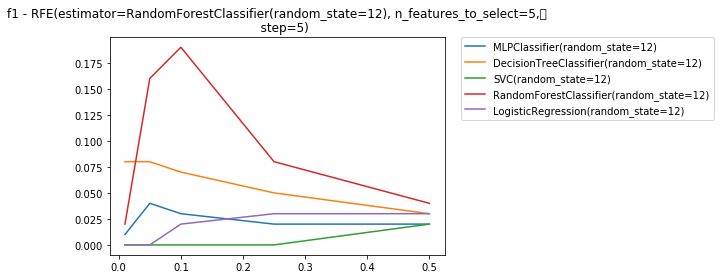

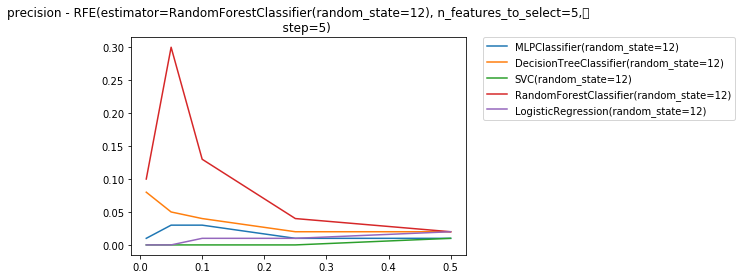

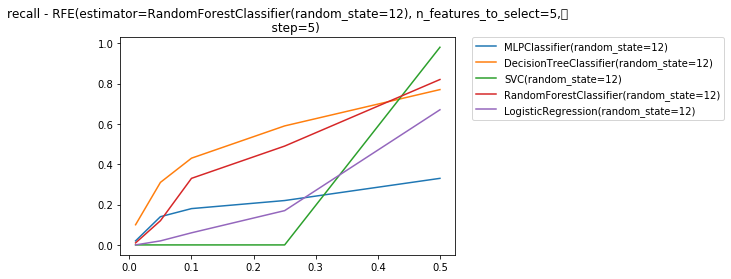

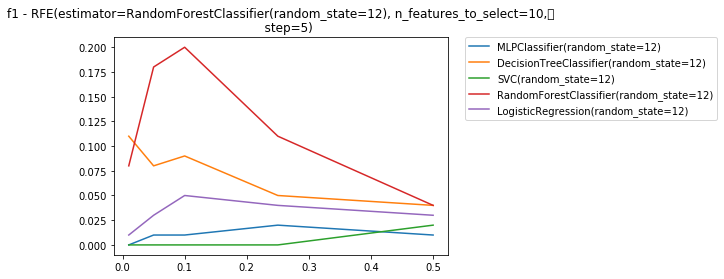

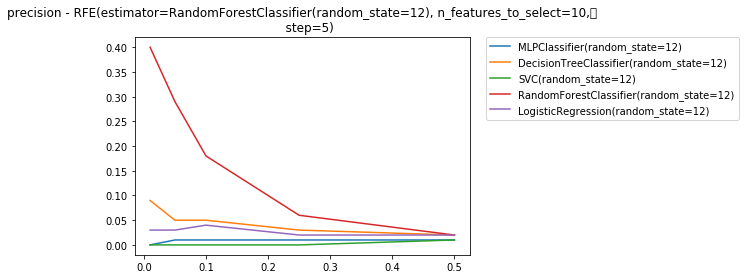

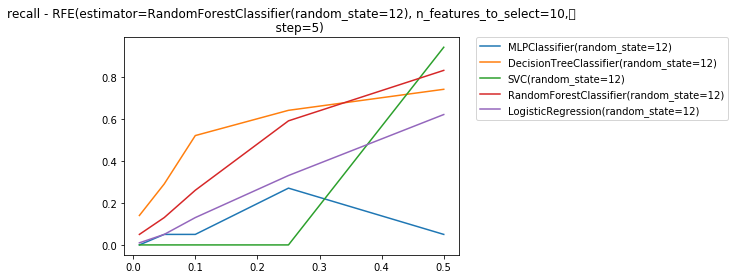

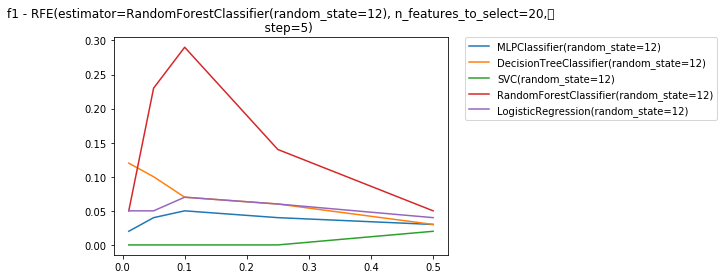

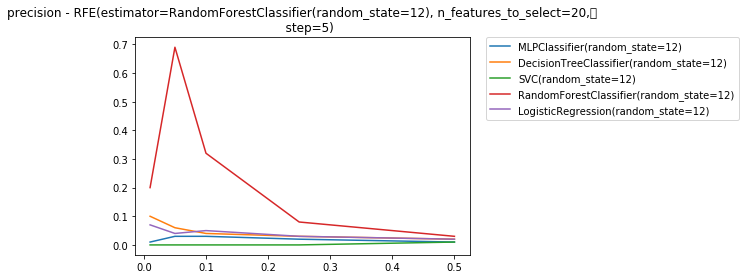

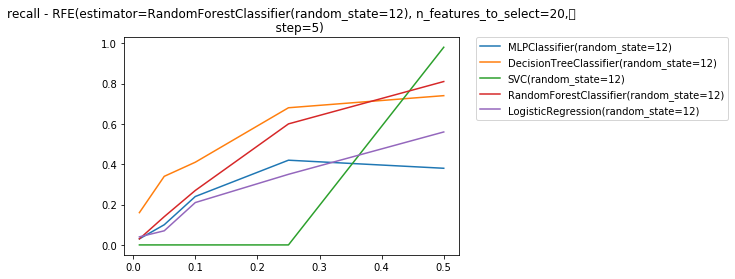

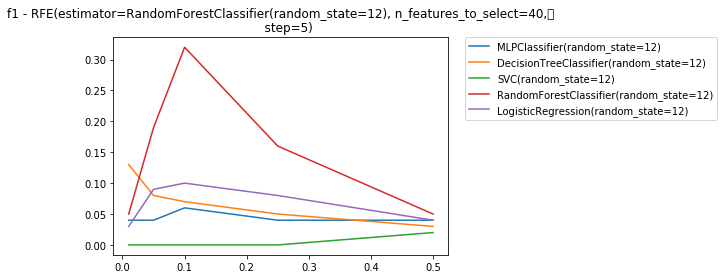

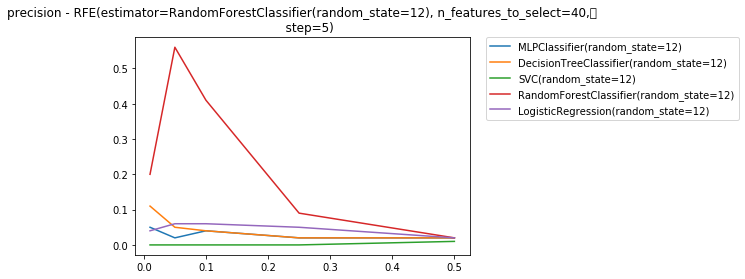

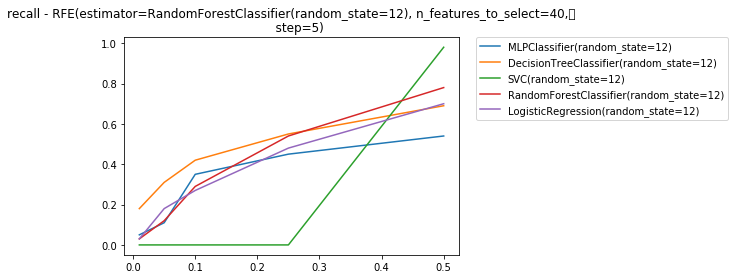

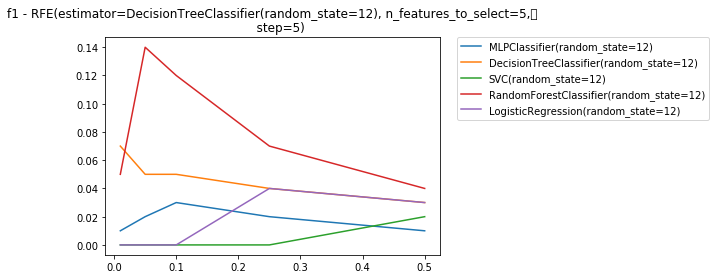

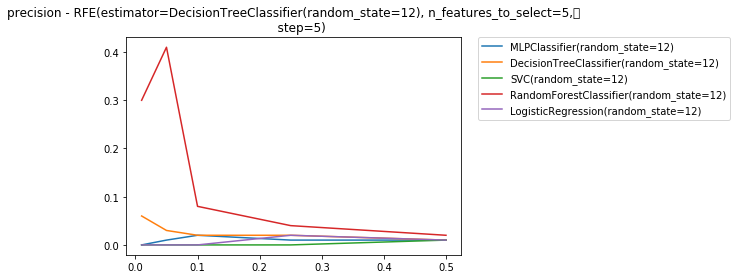

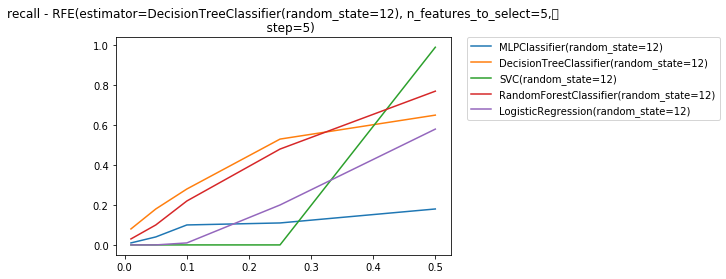

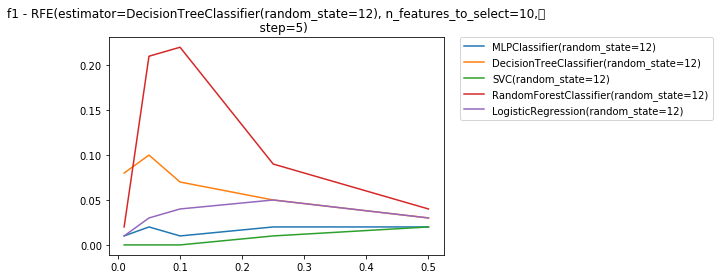

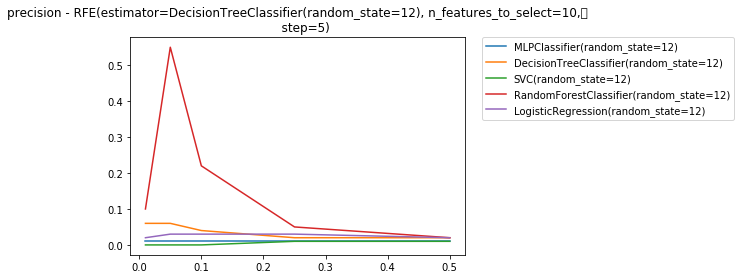

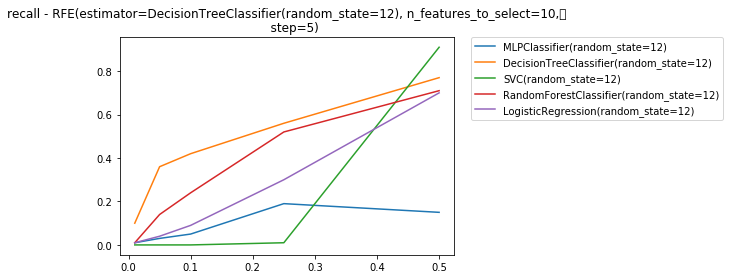

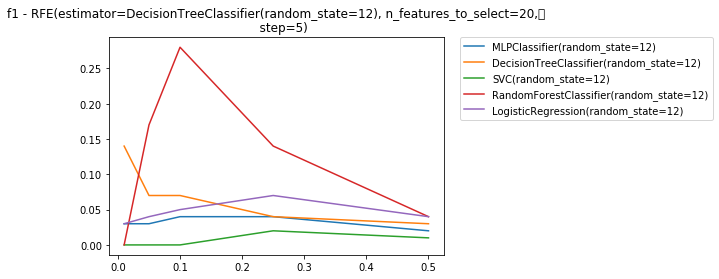

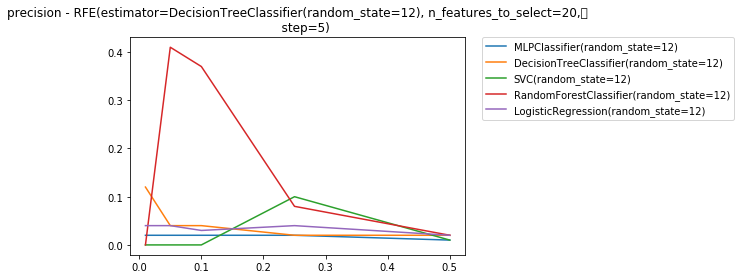

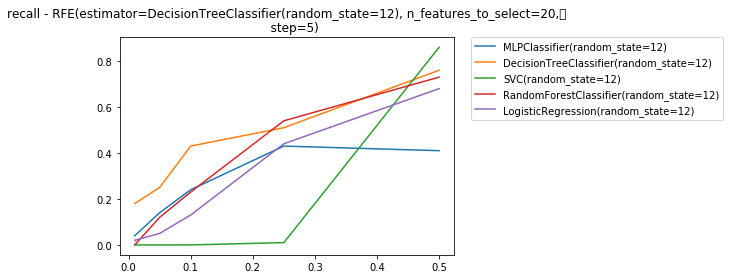

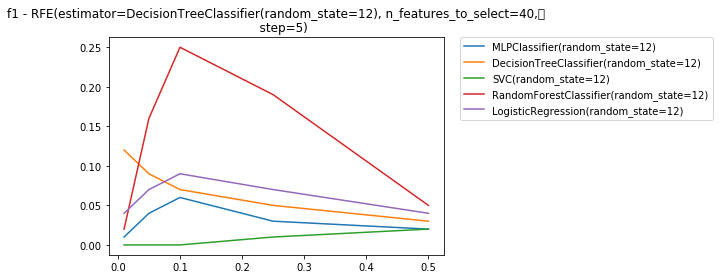

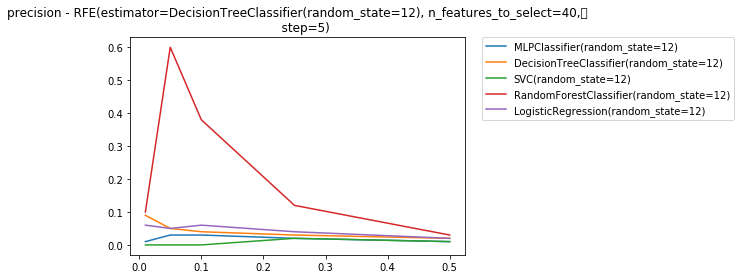

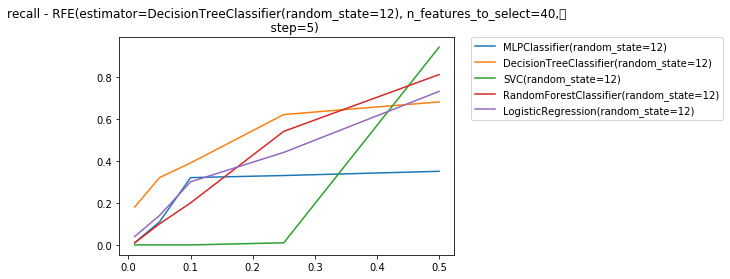

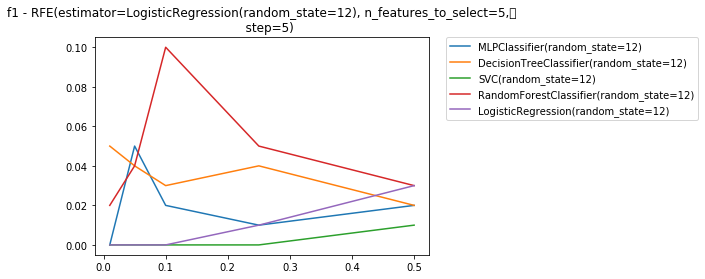

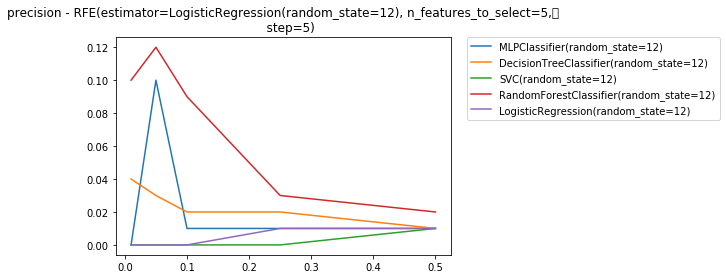

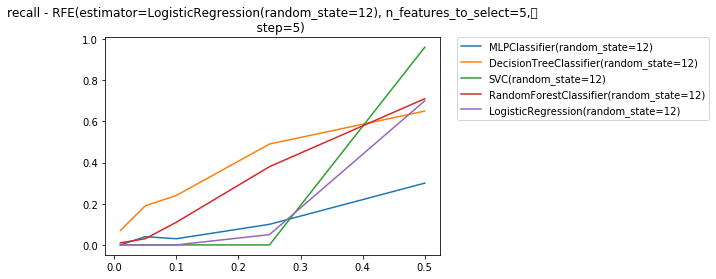

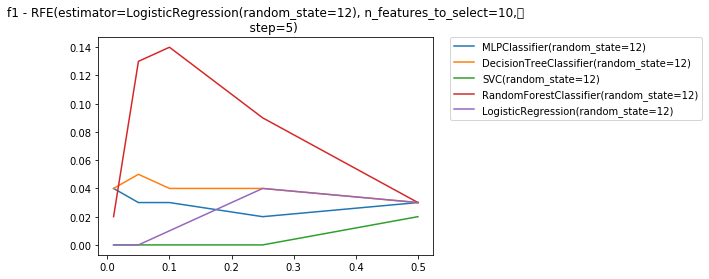

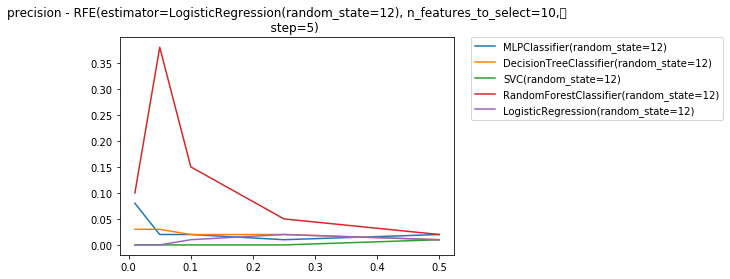

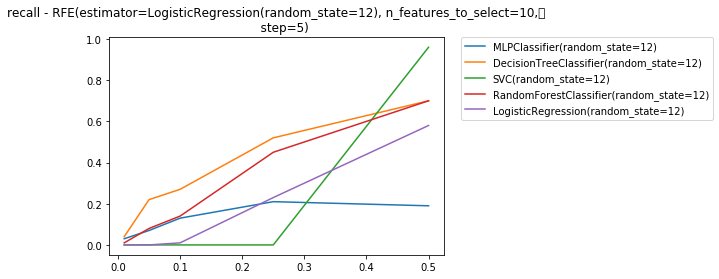

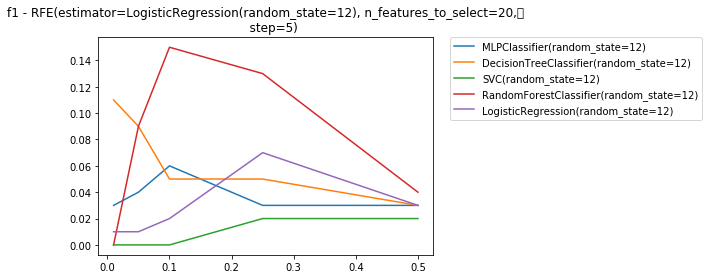

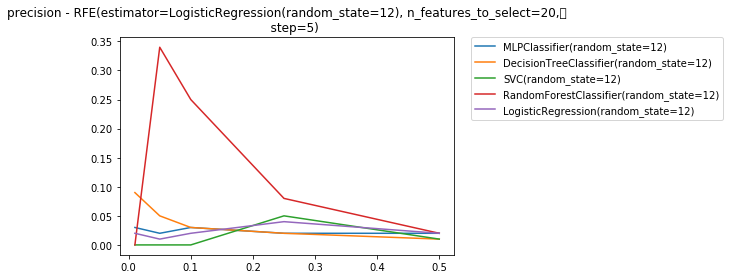

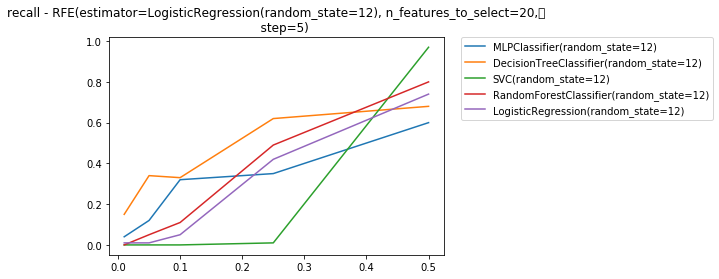

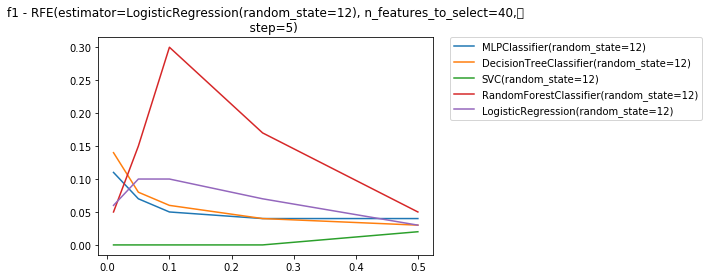

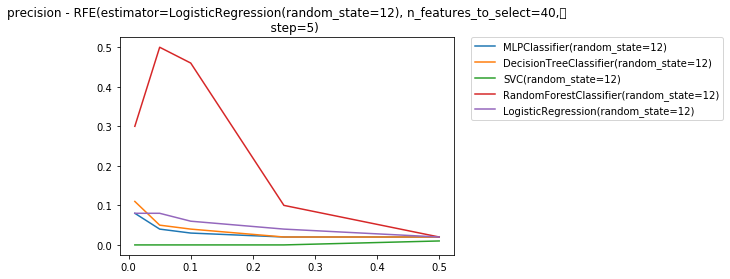

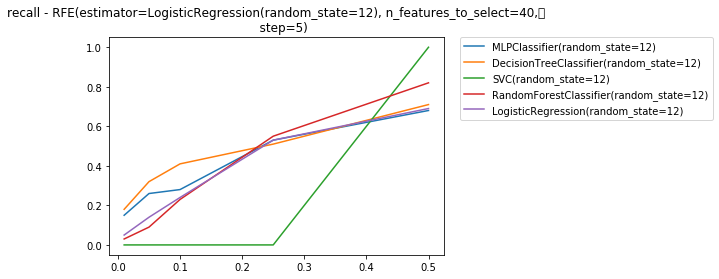

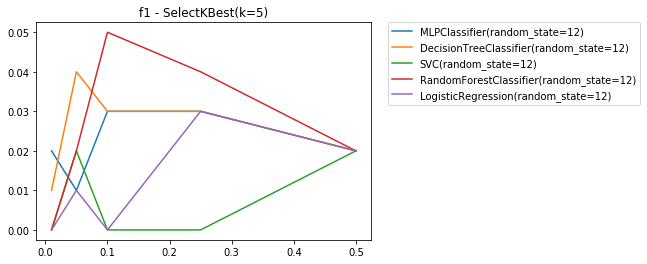

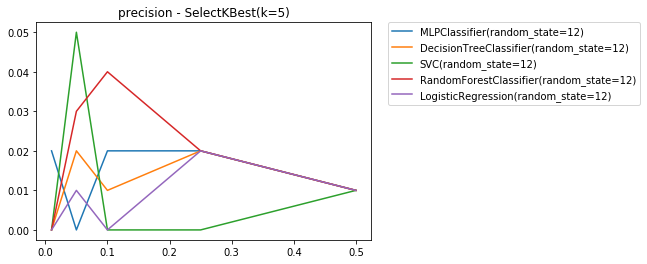

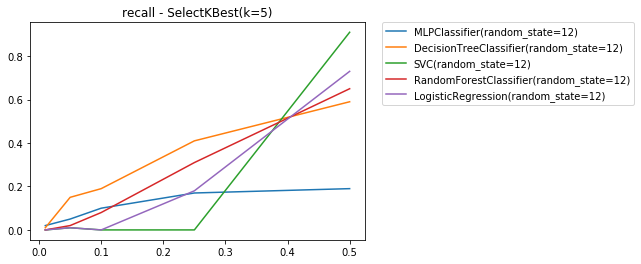

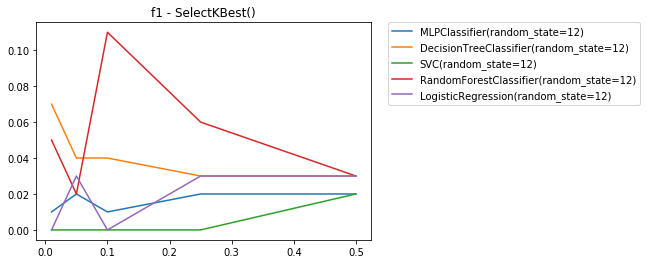

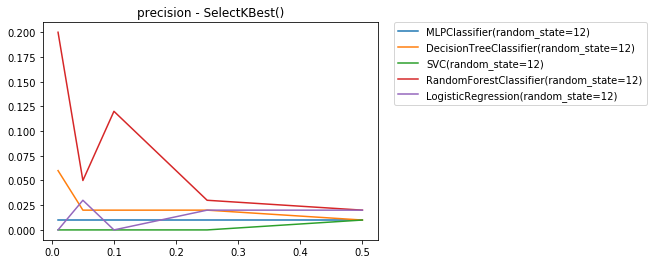

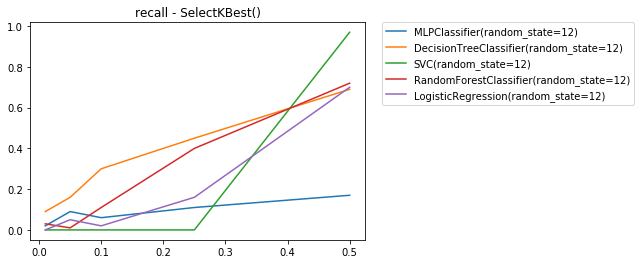

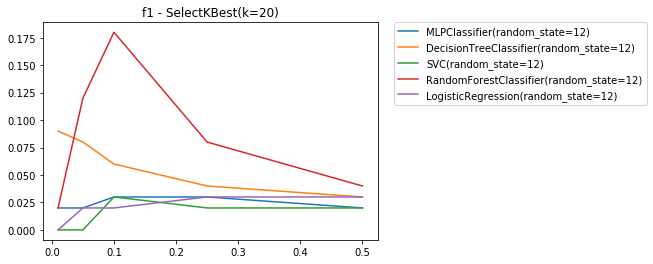

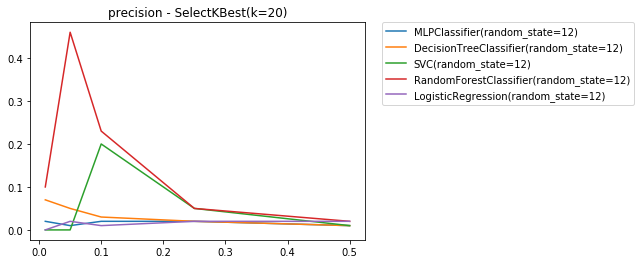

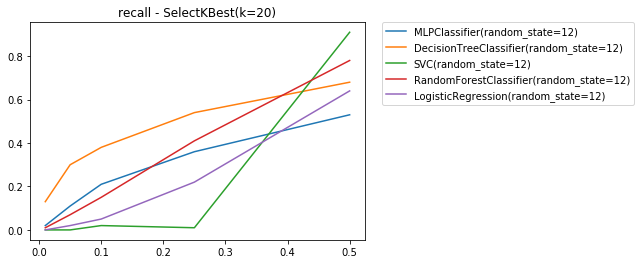

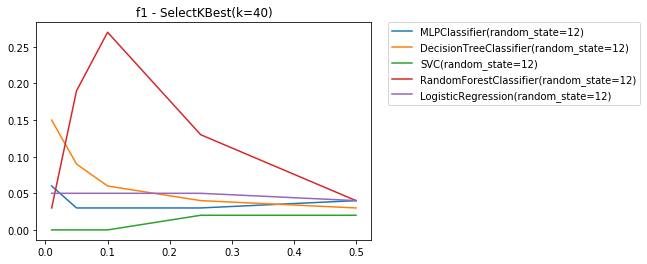

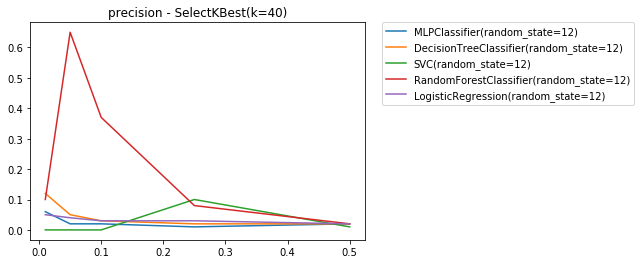

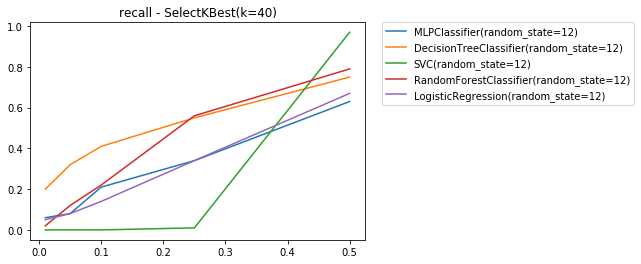

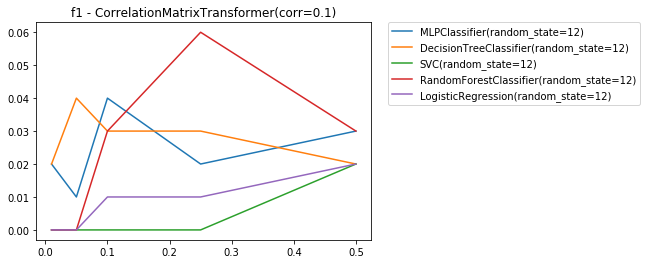

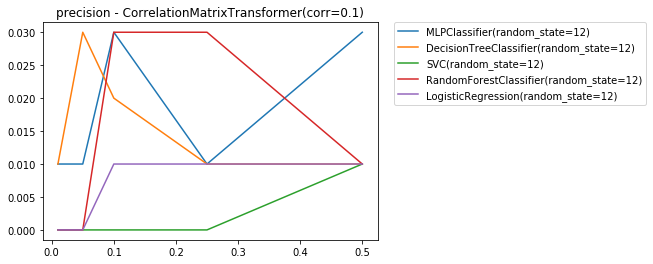

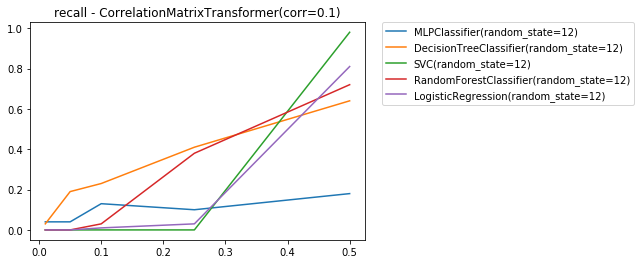

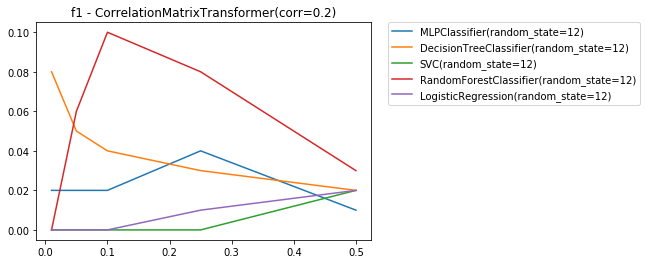

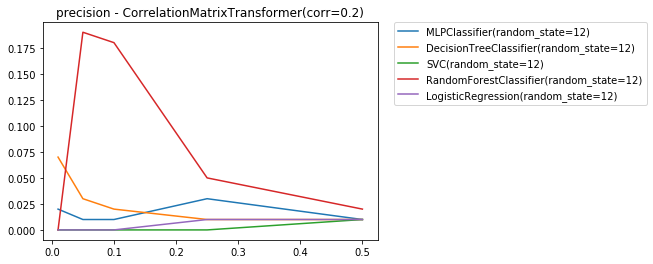

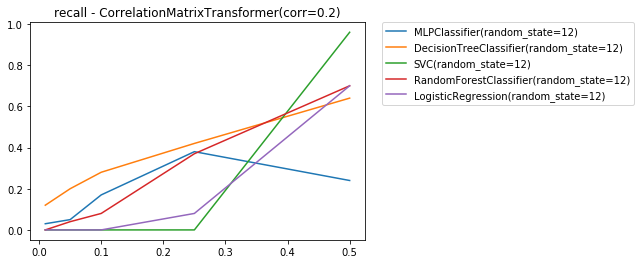

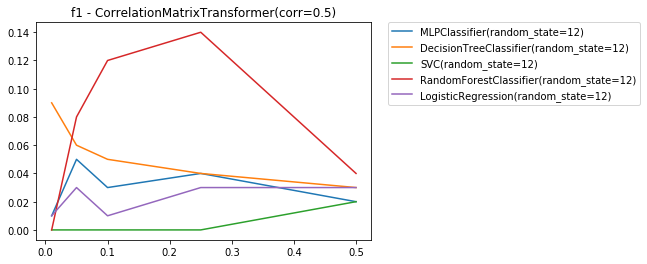

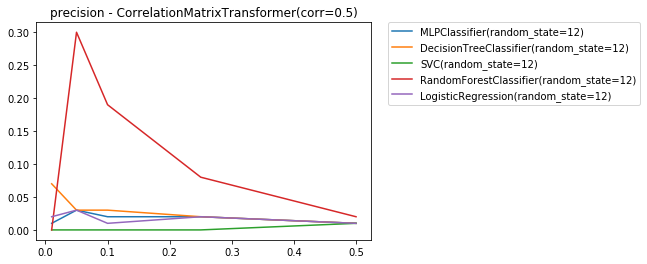

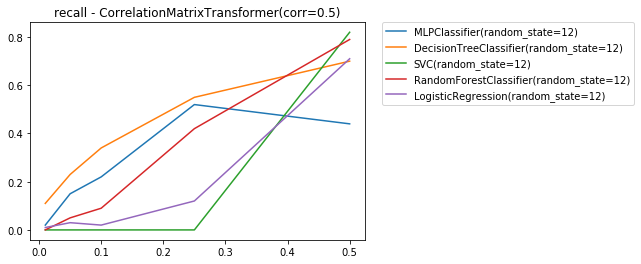

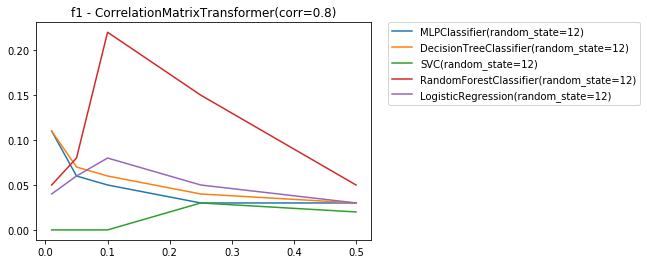

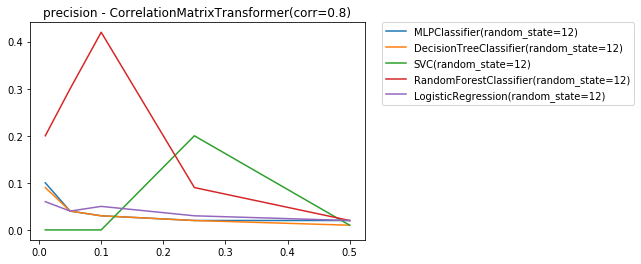

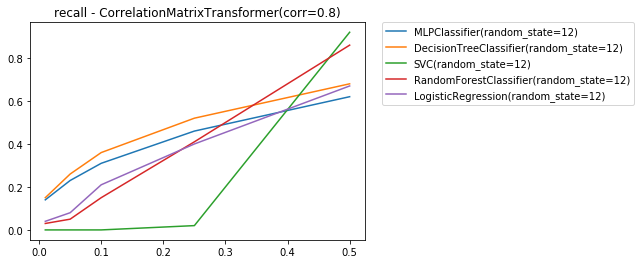

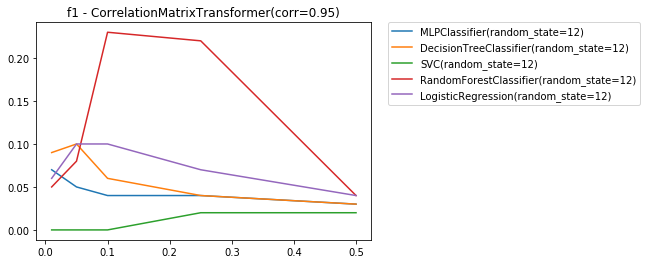

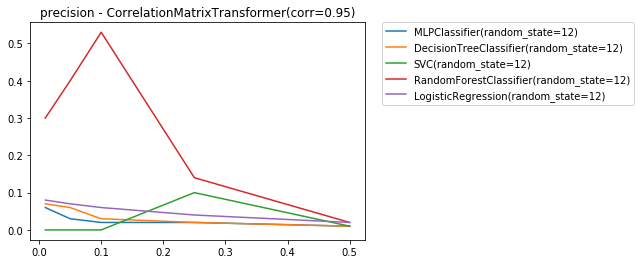

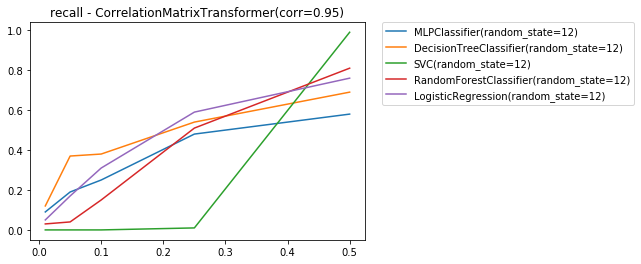

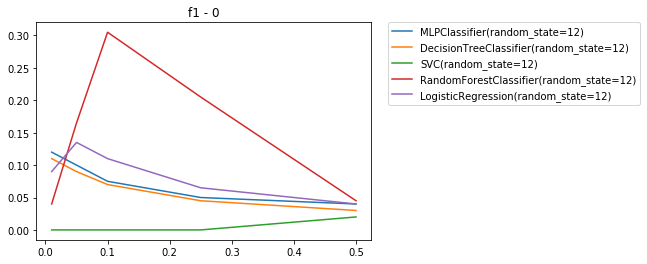

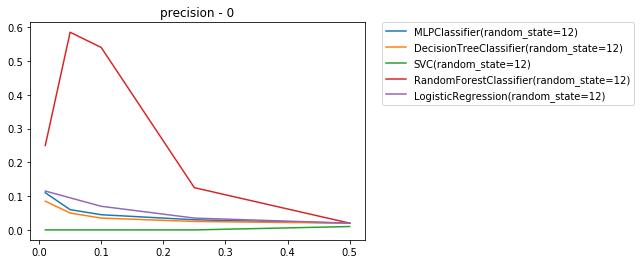

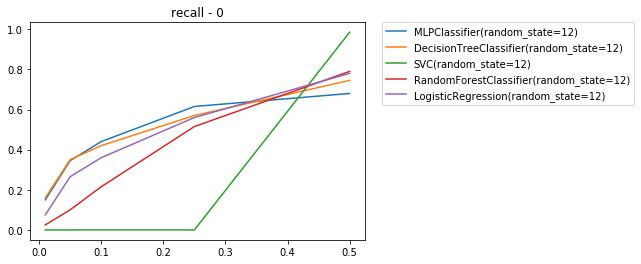

In [19]:
# Note that reports are not available in html exported version
get_report(pd.read_csv('experiments/Feature_Selection/B.csv').fillna(0))